![Stay Home](https://www.cdc.gov/sepsis/images/sepsis-chain-reaction-fb1.gif)

<a id="1.1"></a> 
## <h1 style="color:red;font-size:40px;font-family:Georgia;text-align:center;"><strong>Table of Content</strong></h1>
### 1. [Data Preparation & Data exploration (EDA)](#1)
### 2. [Feature Engineering](#2)
### 3. [Model Traning](#3)
### 4. [Further Evaluation on choosen model ( Decision Tree)](#4)
 
***

# <h1 style="color:red;font-size:40px;font-family:Georgia;text-align:center;"><strong>1. Hypothisis </strong></h1>

## Guessing
- High Weight likely get more positive stepsis
- High Age likely get positive stepsis
- Other values high can also lead to positive sepsis
***

<a id="1"></a>
<h1 style="color:red;font-size:40px;font-family:Georgia;text-align:center;"><strong> 2. Data Preparation & Data exploration (EDA) </strong></h1>

***

Before we dive into finding relations between independent variables and our dependent variable(Sepsis), let us create some assumptions about how the relations may turn-out among features.

**Assumptions:**
- PRG: High will get sepsis
- M11  : Obese will likely get sepsis
- AGE : old is likely get sepsis than young


## 2.1 Import necessary library

In [152]:
pip install -U imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [153]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [154]:
pip install vecstack

Note: you may need to restart the kernel to use updated packages.


In [155]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [156]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [157]:
pip install mlens

Note: you may need to restart the kernel to use updated packages.


In [158]:
"""Import basic modules."""
import numpy as np               # For linear algebra
import pandas as pd              # For data manipulation
import matplotlib.pyplot as plt  # For 2D visualization
import seaborn as sns            
from scipy import stats          # For statistics
 
"""Plotly visualization."""
import plotly.graph_objs as go
from plotly.subplots import make_subplots
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected = True) # Required to use plotly offline in jupyter notebook

"""Machine learning models."""
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn import tree

"""Classification (evaluation) metrices."""
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.calibration import CalibrationDisplay



"""Ensembling"""
from mlxtend.classifier import EnsembleVoteClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions
from sklearn.ensemble import BaggingClassifier
from mlens.ensemble import BlendEnsemble
from vecstack import stacking

In [159]:
"""Classification (evaluation) metrices."""
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, roc_auc_score

In [160]:
from IPython.display import Markdown
from IPython.display import display, HTML
def bold(string):
    return display(Markdown(f"**{string}**"))

## 2.1 Data Preparation

In [161]:
train = pd.read_csv("Paitients_Files_Train.csv").drop("ID", axis=1)
train.columns = train.columns.str.replace(' ', '') #strip the extra-whitespaces out

In [162]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PRG        599 non-null    int64  
 1   PL         599 non-null    int64  
 2   PR         599 non-null    int64  
 3   SK         599 non-null    int64  
 4   TS         599 non-null    int64  
 5   M11        599 non-null    float64
 6   BD2        599 non-null    float64
 7   Age        599 non-null    int64  
 8   Insurance  599 non-null    int64  
 9   Sepssis    599 non-null    object 
dtypes: float64(2), int64(7), object(1)
memory usage: 46.9+ KB


In [163]:
validation = pd.read_csv("Paitients_Files_Train.csv")

### Import Test dataset

In [164]:
test = pd.read_csv("Paitients_Files_Test.csv")
test.columns = test.columns.str.replace(' ', '') #strip the extra-whitespaces ou

In [165]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         169 non-null    object 
 1   PRG        169 non-null    int64  
 2   PL         169 non-null    int64  
 3   PR         169 non-null    int64  
 4   SK         169 non-null    int64  
 5   TS         169 non-null    int64  
 6   M11        169 non-null    float64
 7   BD2        169 non-null    float64
 8   Age        169 non-null    int64  
 9   Insurance  169 non-null    int64  
dtypes: float64(2), int64(7), object(1)
memory usage: 13.3+ KB


 ##  ❓<span style="color:blue ">OBSERVATION: </span>
 

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#3D3D3D;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:#FFD154;">
The TRAIN Dataframe contain 598 records and 10 columns. There are 598 training examples in the dataset, this is a good sign since there seems to be large enough data for machine learning. The shape of the dataset tells is that I have 10 attributes. Of the 10 attributes, one is the target variable that the model should predict. This means that I have 9 attributes that have the potential to be used to train my future predictive model.
</p>
</div>


***


## Task 2.2: Check data types & Make the data homogeneous

In [166]:
# convert columns to the best possible dtypes, object->string
train = train.convert_dtypes()
test = test.convert_dtypes()
validation = validation.convert_dtypes()

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PRG        599 non-null    Int64  
 1   PL         599 non-null    Int64  
 2   PR         599 non-null    Int64  
 3   SK         599 non-null    Int64  
 4   TS         599 non-null    Int64  
 5   M11        599 non-null    Float64
 6   BD2        599 non-null    Float64
 7   Age        599 non-null    Int64  
 8   Insurance  599 non-null    Int64  
 9   Sepssis    599 non-null    string 
dtypes: Float64(2), Int64(7), string(1)
memory usage: 52.2 KB


 ##  ❓<span style="color:blue ">OBSERVATION: </span>
 

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#3D3D3D;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:#FFD154;">
The method .info() is great for checking out the data types of the different features already coverted into the desired types and non-null values. However, it is not great for getting a visual picture of what is missing for the different features. You will use missingno for this
</p>
</div>


***


# 2.3 Missing Values

In [167]:
"""#1.Create a function to calculate missing values"""
def calculateMissingValues(variable):
    """Calculates missing values of a variable."""
    
    return train.isna().sum()[train.isna().sum()>0] # Returns only columns with missing values



""""#2.Create a function to plot scatter plot.
This can also be used to plot missing values"""
def plotScatterPlot(x, y, title, yaxis):
    trace = go.Scatter(
    x = x,
    y = y,
    mode = "markers",
    marker = dict(color = y, size = 35, showscale = True, colorscale = "Rainbow"))
    layout = go.Layout(hovermode= "closest",
                       title = title,
                       yaxis = dict(title = yaxis),
                       height=600,
                       width=900,
                       showlegend=False,
                        paper_bgcolor="rgb(243, 243, 243)",
                        plot_bgcolor="rgb(243, 243, 243)"
                      )
    fig = go.Figure(data = [trace], layout = layout)
    return fig.show()      

In [168]:
"""Plot variables with their corresponding missing values."""
plotScatterPlot(calculateMissingValues(train).index,
               calculateMissingValues(train),
               "Features with Missing Values",
               "Missing Values")

 ##  ❓<span style="color:blue ">OBSERVATION: </span>
 

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#3D3D3D;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:#FFD154;">
There is no missing values in data
</p>
</div>


***


# 2.5 Typos

## Transform to UPERCASE

In [169]:
# Cast all values inside the dataframe (except the columns' name) into upper case.
train = train.applymap(lambda s: s.upper() if type(s) == str else s)
train.head(3)

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,6,148,72,35,0,33.6,0.627,50,0,POSITIVE
1,1,85,66,29,0,26.6,0.351,31,0,NEGATIVE
2,8,183,64,0,0,23.3,0.672,32,1,POSITIVE


In [170]:
# Cast all values inside the dataframe (except the columns' name) into upper case.
test = test.applymap(lambda s: s.upper() if type(s) == str else s)
test.head(3)

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
0,ICU200609,1,109,38,18,120,23.1,0.407,26,1
1,ICU200610,1,108,88,19,0,27.1,0.400,24,1
2,ICU200611,6,96,0,0,0,23.7,0.190,28,1


 ##  ❓<span style="color:blue ">OBSERVATION: </span>
 

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#3D3D3D;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:#FFD154;">
Value of Sepsis now has been changed to encoding value(0 and 1)
</p>
</div>

## Rename Column Sepssis to Sepsis

In [171]:
#rename
train.rename(columns={"Sepssis": "Sepsis"}, inplace=True)
test.rename(columns={"Sepssis": "Sepsis"}, inplace=True)

## Change Sepsis to 0 (negative) and 1 (positive)

In [172]:
import numpy
train.loc[train['Sepsis'].isin(['POSITIVE']), 'Sepsis'] = '1'
train.loc[train['Sepsis'].isin(['NEGATIVE']), 'Sepsis'] = '0'
train['Sepsis'] = train['Sepsis'].astype('int')

## M11
Filter M11 imposible value

In [173]:
train_M11_q_low = train["M11"].quantile(0.01)
train_M11_q_hi  = train["M11"].quantile(0.99)

df_filtered = train[(train["M11"] > train_M11_q_hi) | (train["M11"] < train_M11_q_low) | (train["M11"] == 0)]
print(len(df_filtered)/ len(train) * 100)
df_filtered

2.337228714524207


,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepsis
9,8,125,96,0,0,0.0,0.232,54,1,1
49,7,105,0,0,0,0.0,0.305,24,0,0
60,2,84,0,0,0,0.0,0.304,21,0,0
81,2,74,0,0,0,0.0,0.102,22,1,0
120,0,162,76,56,100,53.2,0.759,25,1,1
125,1,88,30,42,99,55.0,0.496,26,1,1
145,0,102,75,23,0,0.0,0.572,21,1,0
177,0,129,110,46,130,67.1,0.319,26,1,1
303,5,115,98,0,0,52.9,0.209,28,1,1
371,0,118,64,23,89,0.0,1.731,21,1,0


In [174]:
test_M11_q_low = test["M11"].quantile(0.01)
test_M11_q_hi  = test["M11"].quantile(0.99)

df_filtered = test[(test["M11"] > test_M11_q_hi) | (test["M11"] < test_M11_q_low) | (test["M11"] == 0)]
print(len(df_filtered)/ len(test) * 100)
df_filtered

2.366863905325444


,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
74,ICU200683,3,123,100,35,240,57.3,0.880,22,0
82,ICU200691,0,162,76,36,0,49.6,0.364,26,1
85,ICU200694,5,136,82,0,0,0.0,0.640,69,1
107,ICU200716,10,115,0,0,0,0.0,0.261,30,1


# 2.6 Sanity checks

Code for checking duplication , outliers and imposible value of the dataset

## 2.6.1 Check duplication


In [175]:
# TRAIN
print("Number of rows before drop of duplicates  in TRAIN:", len(train.index))
print("Number of duplicated records in TRAIN: ", train.duplicated().sum())
train.drop_duplicates(inplace=True)
print("Number of rows after drop of duplicates in TRAIN:", len(train.index), "\n\n")


# VALIDATION
print("Number of rows before drop of duplicates in VALIDATION:", len(test.index))
print("Number of duplicated records in VALIDATION: ", test.duplicated().sum())
validation.drop_duplicates(inplace=True)
print("Number of rows after drop of duplicates in VALIDATION:", len(test.index))

Number of rows before drop of duplicates  in TRAIN: 599
Number of duplicated records in TRAIN:  0
Number of rows after drop of duplicates in TRAIN: 599 


Number of rows before drop of duplicates in VALIDATION: 169
Number of duplicated records in VALIDATION:  0
Number of rows after drop of duplicates in VALIDATION: 169


 ##  ❓<span style="color:blue ">OBSERVATION: </span>
 

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#3D3D3D;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:#FFD154;">
No Duplication
</p>
</div>

## 2.6.2 Impossible values

In [176]:
train.describe().round(2)

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepsis
count,599.00,599.00,599.00,599.00,599.00,599.00,599.00,599.00,599.00,599.00
mean,3.82,120.15,68.73,20.56,79.46,31.92,0.48,33.29,0.69,0.35
std,3.36,32.68,19.34,16.02,116.58,8.01,0.34,11.83,0.46,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00,0.00,0.00
25%,1.00,99.00,64.00,0.00,0.00,27.10,0.25,24.00,0.00,0.00
50%,3.00,116.00,70.00,23.00,36.00,32.00,0.38,29.00,1.00,0.00
75%,6.00,140.00,80.00,32.00,123.50,36.55,0.65,40.00,1.00,1.00
max,17.00,198.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00,1.00


In [177]:
# Drop rows that have M11 equal and below 0

train = train[train["M11"] != 0]

test = test[test["M11"] != 0]


print("TRAIN DATASET: ")
print(train[["M11"]].describe().round(2))

print("TEST DATASET: ")
print(test[["M11"]].describe().round(2))

TRAIN DATASET: 
          M11
count  590.00
mean    32.41
std      7.02
min     18.20
25%     27.32
50%     32.00
75%     36.60
max     67.10
TEST DATASET: 
          M11
count  167.00
mean    32.64
std      6.59
min     19.50
25%     27.75
50%     32.40
75%     36.70
max     57.30


 ##  ❓<span style="color:blue ">OBSERVATION: </span>
 

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#3D3D3D;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:#FFD154;">
            M11( Weight) is impossible with value 0 so I decided drop 0 or below that
</p>
</div>


***


# 2.7 Extra exploration and visualization

### 2.7.1 Histogram of each column

<Figure size 720x540 with 0 Axes>

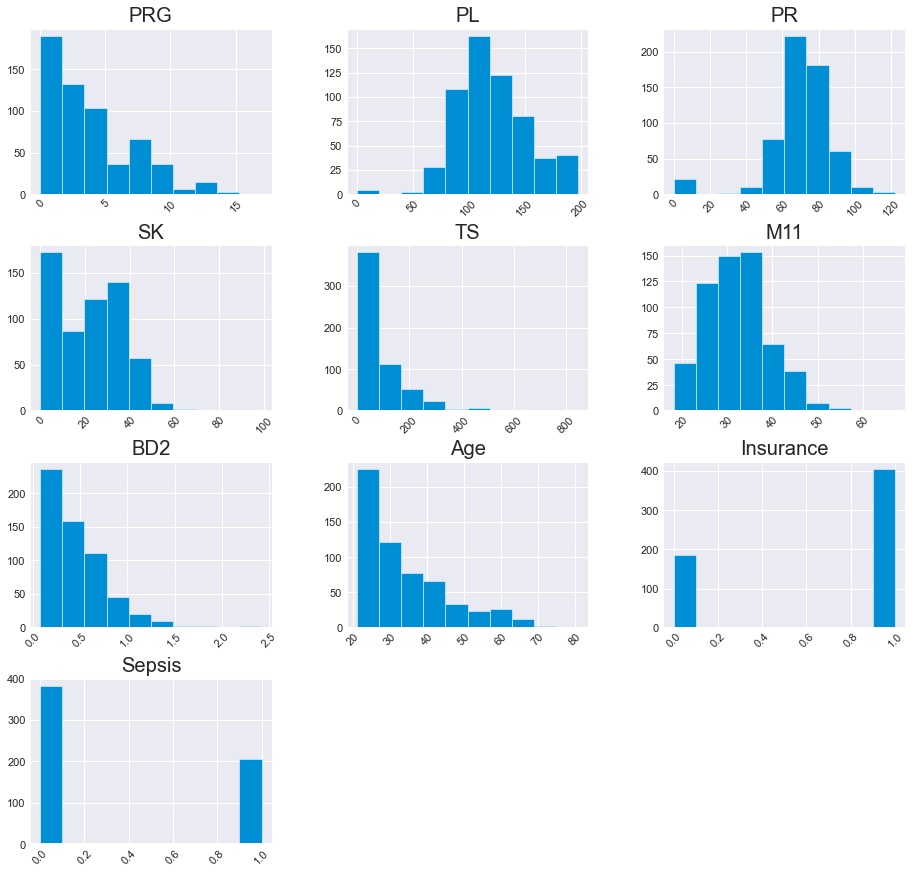

In [178]:
plt.figure()
train.hist(figsize=(14,14), xrot=45)
plt.show()

 ##  ❓<span style="color:blue ">OBSERVATION: </span>
 

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#3D3D3D;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:#FFD154;">
PRG ,SK ,TS ,BD2 have the same distribute
PL , PR ,M11 have the same distribution
</p>
</div>


***


### 2.7.2 Statistic of dataset

In [179]:
train.describe()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepsis
count,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000
mean,3.835593,120.467797,69.383051,20.798305,80.522034,32.406949,0.481976,33.398305,0.686441,0.350847
std,3.367439,32.765279,18.156714,15.980729,117.092357,7.021781,0.334917,11.821781,0.464333,0.477640
min,0.000000,0.000000,0.000000,0.000000,0.000000,18.200000,0.078000,21.000000,0.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.325000,0.249000,24.000000,0.000000,0.000000
50%,3.000000,116.500000,70.000000,23.000000,39.000000,32.000000,0.388500,29.000000,1.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,125.750000,36.600000,0.650750,40.000000,1.000000,1.000000
max,17.000000,198.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000,1.000000


 ##  ❓<span style="color:blue ">OBSERVATION: </span>
 

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#3D3D3D;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:#FFD154;">
This train data set has 601 raw and 9 columns.
and only 34% patient got positive.
</p>
</div>


***



### <span style="color:red"> Outliers detection</span>

In [180]:
def whitespace_remover(df):
    """
    The function will remove extra leading and trailing whitespace from the data.
    """
    # iterating over the columns
    for i in df.columns:
        # checking datatype of each columns
        if df[i].dtype == 'object' or df[i].dtype == 'str':
            # applying strip function on column
            df[i] = df[i].map(str.strip)
        else:
            # if condition is False then it will do nothing.
            pass

# remove all the extra whitespace
whitespace_remover(train)
whitespace_remover(test)

In [181]:
"""#1.Create a function that removes outliers"""
def removeOutliers(variable):
    """Calculates and removes outliers using IQR method."""
    
    # Calculate 1st, 3rd quartiles and iqr.
    q1, q3 = variable.quantile(0.25), variable.quantile(0.75)
    iqr = q3 - q1
    
    # Calculate lower fence and upper fence for outliers
    lowerFence, upperFence = q1-1.5*iqr, q3+1.5*iqr   # Any values less than l_fence and greater than u_fence are outliers.
    
    # Observations that are outliers
    outliers = variable[(variable<lowerFence) | (variable>upperFence)]
    
    # Drop obsevations that are outliers
    filtered = variable.drop(outliers.index, axis = 0).reset_index(drop=True)
    return filtered


"""#2.Create another function to plot boxplot with and without outliers."""
def plotBoxPlot(variable,filteredVariable):
    """Plots Box plot of a variable with and without outliers.
    We will also use the output of removeOutliers function as the input to this function.
    variable = variable with outliers,
    filteredVariable = variable without outliers"""
    
    # Create subplot object.
    fig = make_subplots(
        rows=2,
        cols=1,
        print_grid=False,
    subplot_titles=(f"{variable.name} Distribution with Outliers", f"{variable.name} Distribution without Outliers"))
    
    # This trace plots boxplot with outliers
    fig.add_trace(
        go.Box(
            x = variable,
            name = "", # This removes trace 0
            marker = dict(color="darkred")
        ),
    row=1,col=1)
    
    # This trace plots boxplot without outliers
    fig.add_trace(
        go.Box(
            x = filteredVariable,
            name = "",
            marker = dict(color="green")
        ),
    row=2,col=1)
    
    # Update layout
    fig.layout.update(
        height=800, 
        width=870,
        showlegend=False,
        paper_bgcolor="rgb(243, 243, 243)",
        plot_bgcolor="rgb(243, 243, 243)"
        )
    
    # Update axes
    fig.layout.xaxis2.update(title=f"<b>{variable.name}</b>")
    return fig.show()

In [182]:
"""Plot Age with and without outliers."""
plotBoxPlot(train.Age,removeOutliers(train.Age))

 ##  ❓<span style="color:blue ">OBSERVATION: </span>
 

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#3D3D3D;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:#FFD154;">
The boxplot is skewed right.It means adults( >30 ) more likely get sepsis
</p>
</div>


***


# Age remove outlines

In [183]:
"""Plot Weight with and without outliers."""
plotBoxPlot(train.M11,removeOutliers(train.M11))


 ##  ❓<span style="color:blue ">OBSERVATION: </span>
 

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#3D3D3D;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:#FFD154;">
The boxplot is normal skewed distribution .
</p>
</div>


***


## Bivariate Analysis

In [184]:
"""Let's split the train and test data for bivariate analysis since test data has no Survived values. We need our target variable without missing values to conduct the association test with predictor variables."""
df_train = train.iloc[:599, :]
df_test = train.iloc[599:, :]

"""#1.Create a function that creates boxplot between categorical and numerical variables and calculates biserial correlation."""
def boxplotAndCorrelation(numVariable,catVariable=df_train.Sepsis):
    """Return boxplot between a categorical and numerical variable. Also calculates biserial correlation.
    numVariable = a numerical variable of interest."""
    # Calculate point biserial correlation and p value
    biserialCorr = stats.pointbiserialr(numVariable,catVariable)[0].round(2)
    pValue = stats.pointbiserialr(numVariable,catVariable)[1].round(5)
    
    # Create subplot object.
    fig = make_subplots(
        rows=1,
        cols=1,
        print_grid=False,
    )
    
    # This trace plots boxplot of categorical variable vs numerical variable
    fig.add_trace(
        go.Box(
            x = catVariable,
            y = numVariable,
            marker_color="lightseagreen",
            ))
    
    
    # Update layout
    fig.layout.update(
        height=500, 
        width=900,
        showlegend=False,
        title_text= f"Association between {catVariable.name} and {numVariable.name} (corr: {biserialCorr}, p: {pValue})",
        paper_bgcolor="rgb(243, 243, 243)",
        plot_bgcolor="rgb(243, 243, 243)"
        )
    
    # Update axes
    fig.layout.xaxis1.update(title=f"<b>{catVariable.name}</b>")
    fig.layout.yaxis1.update(title=f"<b>{numVariable.name}</b>")
    return fig.show()


"""#2.Create another function to calculate mean when grouped by categorical variable. And also plot the grouped mean."""
def numGroupedByCat(numVariable,catVariable=df_train.Sepsis):
    """Returns a barplot showing mean of numerical variable across the class of categorical variable."""
    
    # Calculates mean across different classes of categorical variable
    numGroupedByCat = numVariable.groupby(catVariable).mean().round(2)
    
    # Create subplot object.
    fig = make_subplots(
        rows=1,
        cols=1,
        print_grid=False,
    )
    
    # This trace plots barplot
    fig.add_trace(
        go.Bar(
            x = numGroupedByCat.index,
            y = numGroupedByCat,
            text=numGroupedByCat,
            hoverinfo="x+y",
            textposition="auto",
            textfont=dict(family="sans serif",size=15)
        ))
    
    # Update layout
    fig.layout.update(
        height=500, 
        width=900,
        showlegend=False,
        title_text= f"Mean {numVariable.name} across {catVariable.name}",
        paper_bgcolor="rgb(243, 243, 243)",
        plot_bgcolor="rgb(243, 243, 243)"
        )
    
    # Update axes
    fig.layout.xaxis1.update(title=f"<b>{catVariable.name}</b>")
    fig.layout.yaxis1.update(title=f"<b>Mean {numVariable.name}</b>")
    return fig.show()

    
"""#3.This function plots histogram of numerical variable for every class of categorical variable."""
def numHistByCat(numVariable,catVariable=df_train.Sepsis):
    """Returns numerical variable distribution across classes of categorical variable."""
    fig,ax = plt.subplots(1,1,figsize = (18,7))
    font_size = 15
    title_size = 18
    numVariable[catVariable==1].hist(bins=50,color="green", label = "positive", grid = False, alpha=0.5)
    numVariable[catVariable==0].hist(bins=50,color="red", label = "negative", grid = False, alpha=0.5)
    ax.set_yticks([])
    ax.tick_params(axis="x", labelsize=font_size)
    ax.set_xlabel(f"{numVariable.name}", fontsize = font_size)
    ax.set_title(f"{numVariable.name} Distribution of Positive vs Negative", fontsize = title_size)
    plt.legend()
    return plt.show()

   
"""#4.Create a function to calculate anova between numerical and categorical variable."""
def calculateAnova(numVariable, catVariable=df_train.Sepsis):
    """Returns f statistics and p value after anova calculation."""
    
    groupNumVariableByCatVariable1 = numVariable[catVariable==1] # Group our numerical variable by categorical variable(1). Group Fair by survivors
    groupNumVariableByCatVariable0 = numVariable[catVariable==0] # Group our numerical variable by categorical variable(0). Group Fare by victims
    # Calculate one way anova
    fValue, pValue = stats.f_oneway(groupNumVariableByCatVariable1, groupNumVariableByCatVariable0) # Calculate f statistics and p value
    return f"Anova Result between {numVariable.name} & {catVariable.name}: f=> {fValue}, p=> {pValue}"

In [185]:
"""Create a boxplot to visualize the strength of association of Sepsis with Age. Also calculate biserial correlation."""
boxplotAndCorrelation(df_train.Age)

 ##  ❓<span style="color:blue ">OBSERVATION: </span>
 

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#3D3D3D;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:#FFD154;">
Mean of positive Sepsis is higher than negative which means higher age is more likely get positive sepsis
</p>
</div>


***


In [186]:
numGroupedByCat(df_train.Age)

 ##  ❓<span style="color:blue ">OBSERVATION: </span>
 

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#3D3D3D;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:#FFD154;">
This plot will help clearly see mean than the above
</p>
</div>


***


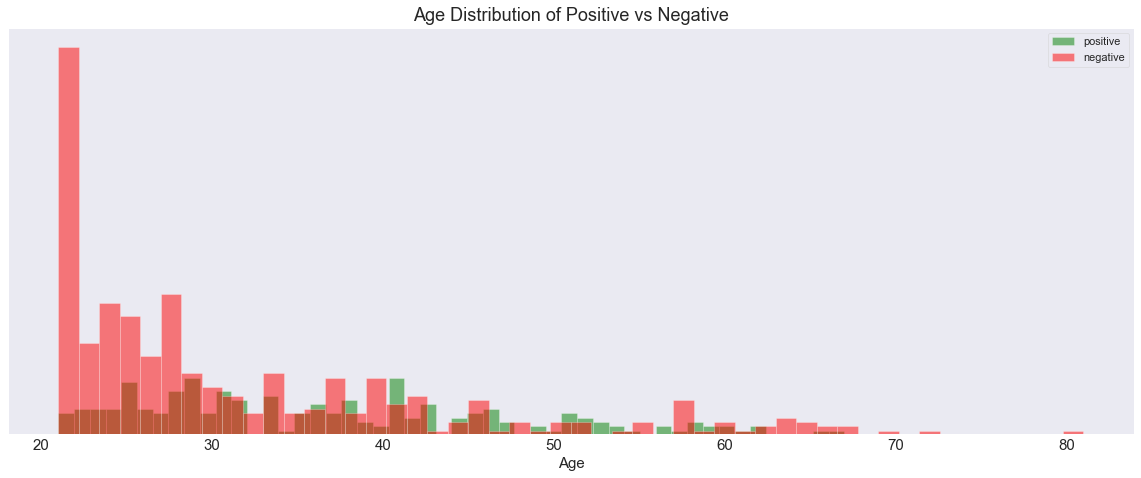

In [187]:
"""Plot histogram of Sepsis's vs Age."""
numHistByCat(df_train.Age)

 ##  ❓<span style="color:blue ">OBSERVATION: </span>
 

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#3D3D3D;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:#FFD154;">
Clearly see negative tends to see more on the left and postive mostly on the right due to old age
</p>
</div>


***


# ANOVA (Analysis Of Variance): 
The ANOVA (ANalysis Of VAriance) test determines whether a numeric response variable varies according to the levels (or class) of a categorical variable. When we say 'ANOVA,' we typically mean the 'one way' ANOVA, which is a test for investigating the effect of a single factor on three or more groups (but two groups would also do, as we explain below).

Though one should use either point biserial correlation (assuming the categorical variable is of binary type) or ANOVA to identify any link between a category and a numerical variable for this topic, I would also use ANOVA to gain an understanding of how ANOVA works.Though ANOVA is normally preferred when a categorical variable has more than two groups, ANOVA may also be performed on a categorical variable with two groups.

The one-way ANOVA examines whether the mean of a numerical variable varies across levels of a categorical variable. It simply answers the question: do any of the means in the group differ from one another? The null hypothesis states that all of the group means are the same. And the alternative hypothesis is that any of the means in the group deviate from one another.

In [188]:
"""Let's perform ANOVA between Fare and Survived. One can omit this step. I perform just to show how anova is performed if there were more than two groups in our categorical variable."""
calculateAnova(df_train.Age)

'Anova Result between Age & Sepsis: f=> 24.529653186456326, p=> 9.576489526868944e-07'

 ##  ❓<span style="color:blue ">OBSERVATION: </span>
 

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#3D3D3D;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:#FFD154;">
As p < 0.05 we state that we have a main interaction effect.This basically indicates that among the groupings, at least one of the group(s) differs statistically substantially from the others (true for only more than two groups). This conclusion, however, does not identify the sample pair (or pairs) responsible for the significance (again true for more than two groups of categorical variable but we have just two groups..i.e., 0 and 1). As a result, when ANOVA shows a 'interaction effect,' we must further define the group pairings by using pair-wise controls (required for more than two groups of categorical variable). Although these controls could be implemented using a standard t-test, this is not the best way. As a result, a post hoc test (typically Tukey's test) is used to identify the pair or pairs responsible for the difference. Tukey's test is not necessary when there are less than three groups in a categorical variable.
           
           
           Note: Tukey's test is not necessary if the p value of the ANOVA is larger than 0.05 and the nominal variable contains less than three groups.
</p>
</div>


***


In [189]:
"""Create a boxplot to visualize the strength of association of Sepsis with M11. Also calculate biserial correlation."""
boxplotAndCorrelation(df_train.M11)

 ##  ❓<span style="color:blue ">OBSERVATION: </span>
 

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#3D3D3D;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:#FFD154;">
 Box plot shows the distribution of M11 between categories of Sepsis (1 and 0) has has correlation value 0.33. And a p value is 0. As we can see that if the patient is heavier they tend to get Sepsis
</p>
</div>


***


In [190]:
numGroupedByCat(df_train.M11)

 ##  ❓<span style="color:blue ">OBSERVATION: </span>
 

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#3D3D3D;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:#FFD154;">
Patients got positive Sepsis are mostly heavier than negative.
</p>
</div>


***


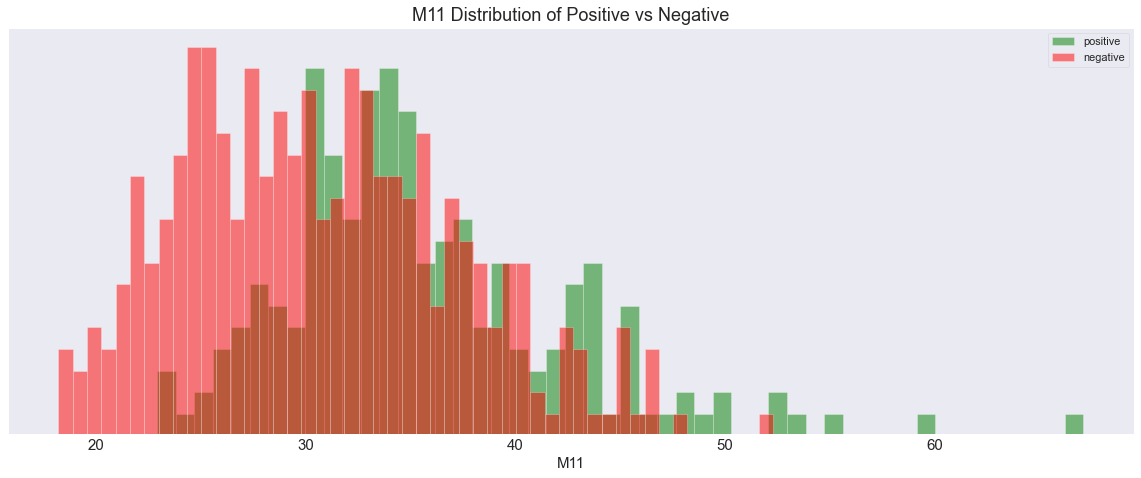

In [191]:
"""Plot histogram of Sepsis's vs M11."""
numHistByCat(df_train.M11)

 ##  ❓<span style="color:blue ">OBSERVATION: </span>
 

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#3D3D3D;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:#FFD154;">
A large number of people from 30 to 40 is get positive Stepsis.The distribution is left
</p>
</div>


***


In [192]:
"""Let's perform ANOVA between Fare and Survived. One can omit this step. I perform just to show how anova is performed if there were more than two groups in our categorical variable."""
calculateAnova(df_train.M11)

'Anova Result between M11 & Sepsis: f=> 71.87515771011587, p=> 1.8529012994711474e-16'


##  ❓<span style="color:blue ">OBSERVATION: </span>
 

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#3D3D3D;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">                                                                              
<p style="padding: 10px;
              color:#FFD154;">      
Interpretation of ANOVA result: Since p>0.05, we can say that M11  is not statistically associated with Sepsis. 
</p>   
</div>


***


<Figure size 2880x2160 with 0 Axes>

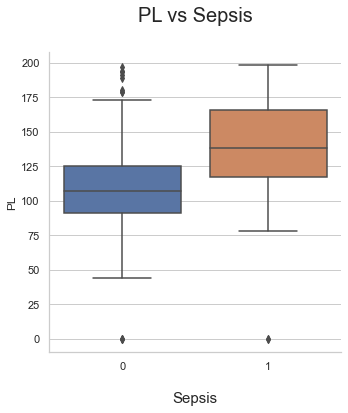

In [193]:
fig = plt.figure(figsize=(40,30));
sns.set(style="whitegrid");
sns.catplot(x='Sepsis', y='PL',
            kind="box", data=train);
plt.title('PL vs Sepsis', fontsize = 20, pad = 30);
plt.ylabel("PL");
plt.xlabel("Sepsis", fontsize = 15, labelpad = 20);

 ##  ❓<span style="color:blue ">OBSERVATION: </span>
 

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#3D3D3D;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:#FFD154;">
Skewed positive is way more higher than negative
</p>
</div>


<Figure size 2880x2160 with 0 Axes>

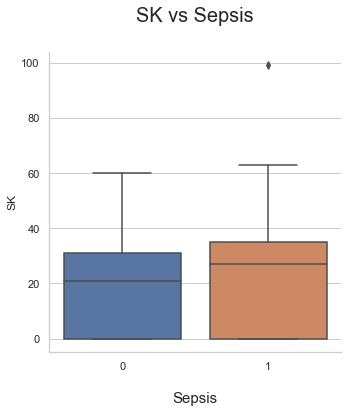

In [194]:
fig = plt.figure(figsize=(40,30))
sns.set(style="whitegrid")
sns.catplot(x='Sepsis', y='SK',
            kind="box", data=train)
plt.title('SK vs Sepsis', fontsize = 20, pad = 30)
plt.ylabel("SK")
plt.xlabel("Sepsis", fontsize = 15, labelpad = 20);

 ##  ❓<span style="color:blue ">OBSERVATION: </span>
 

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#3D3D3D;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:#FFD154;">
Skewed is not so different 
</p>
</div>


<Figure size 2880x2160 with 0 Axes>

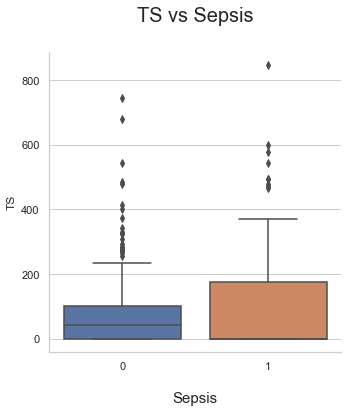

In [195]:
fig = plt.figure(figsize=(40,30))
sns.set(style="whitegrid")
sns.catplot(x='Sepsis', y='TS',
            kind="box", data=train)
plt.title('TS vs Sepsis', fontsize = 20, pad = 30)
plt.ylabel("TS")
plt.xlabel("Sepsis", fontsize = 15, labelpad = 20);

 ##  ❓<span style="color:blue ">OBSERVATION: </span>
 

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#3D3D3D;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:#FFD154;">
Mean of positive skewed is close to 0 mean TS is more likely positive
</p>
</div>


<Figure size 2880x2160 with 0 Axes>

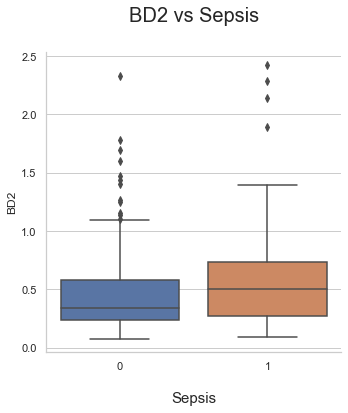

In [196]:
fig = plt.figure(figsize=(40,30))
sns.set(style="whitegrid")
sns.catplot(x='Sepsis', y='BD2',
            kind="box", data=train)
plt.title('BD2 vs Sepsis', fontsize = 20, pad = 30)
plt.ylabel("BD2")
plt.xlabel("Sepsis", fontsize = 15, labelpad = 20);

 ##  ❓<span style="color:blue ">OBSERVATION: </span>
 

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#3D3D3D;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:#FFD154;">
Mean of positive skewed is higher than BD2
</p>
</div>


In [197]:
def age_impute(train, test):
    for i in [train, test]:
        i['Age_Null_Flag'] = i['Age'].apply(lambda x: 1 if pd.isnull(x) else 0)
        data = train.groupby(['Name_Title', 'Pclass'])['Age']
        i['Age'] = data.transform(lambda x: x.fillna(x.mean()))
    return train, test

<AxesSubplot:>

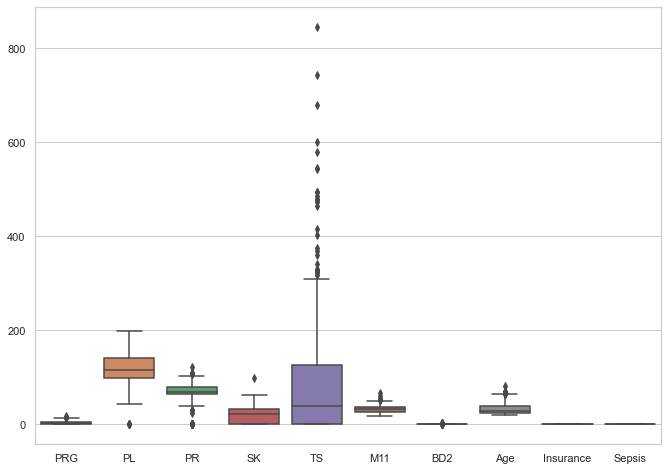

In [198]:
plt.rcParams['figure.figsize'] = [10,7.5]
sns.boxplot(data=train, orient="v")


 ##  ❓<span style="color:blue ">OBSERVATION: </span>
 

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#3D3D3D;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:#FFD154;">
All boxplot of all column has been plot and we can see there are lots of outlier
</p>
</div>


***


# <a id="2"></a><h1 style="color:red;font-size:40px;font-family:Georgia;text-align:center;"><strong>  3. Feature Engineering </strong></h1>
***

# Missing Values

In [199]:
print("Total missing values in TRAIN:", train.isna().sum().sum())
print("Total missing values in TEST:", test.isna().sum().sum())

Total missing values in TRAIN: 0
Total missing values in TEST: 0


 ##  ❓<span style="color:blue ">OBSERVATION: </span>
 

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#3D3D3D;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:#FFD154;">
No missing values in dataset
</p>
</div>



C:\Users\William\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\William\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\William\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning:

Vertical orientation ignored with only `x` specified.



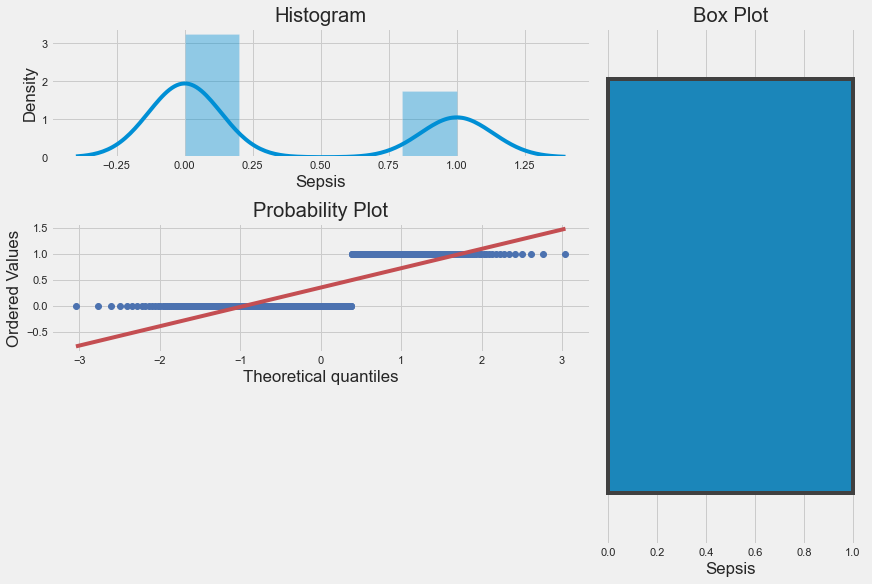

In [200]:
def plotting_3_chart(df, feature):
    ## Importing seaborn, matplotlab and scipy modules. 
    import seaborn as sns
    import matplotlib.pyplot as plt
    import matplotlib.gridspec as gridspec
    from scipy import stats
    import matplotlib.style as style
    style.use('fivethirtyeight')

    ## Creating a customized chart. and giving in figsize and everything. 
    fig = plt.figure(constrained_layout=True, figsize=(12,8))
    ## creating a grid of 3 cols and 3 rows. 
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)
    #gs = fig3.add_gridspec(3, 3)

    ## Customizing the histogram grid. 
    ax1 = fig.add_subplot(grid[0, :2])
    ## Set the title. 
    ax1.set_title('Histogram')
    ## plot the histogram. 
    sns.distplot(df.loc[:,feature], norm_hist=True, ax = ax1)

    # customizing the QQ_plot. 
    ax2 = fig.add_subplot(grid[1, :2])
    ## Set the title. 
    ax2.set_title('QQ_plot')
    ## Plotting the QQ_Plot. 
    stats.probplot(df.loc[:,feature], plot = ax2)

    ## Customizing the Box Plot. 
    ax3 = fig.add_subplot(grid[:, 2])
    ## Set title. 
    ax3.set_title('Box Plot')
    ## Plotting the box plot. 
    sns.boxplot(df.loc[:,feature], orient='v', ax = ax3 );
    
plotting_3_chart(train, 'Sepsis')

 ##  ❓<span style="color:blue ">OBSERVATION: </span>
 

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#3D3D3D;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:#FFD154;">
There are lots of outliners.Sepsis is normal distribution
    
</p>
</div>


***


# Skewness and Kurtosis

In [201]:
#skewness and kurtosis
print("Skewness: " + str(train['Sepsis'].skew()))
print("Kurtosis: " + str(train['Sepsis'].kurt()))

Skewness: 0.6266635508993044
Kurtosis: -1.6127713575156994


### ❓ <span style="color:blue"> OBSERVATION: </span>

Positive Skewess
> There are more positive cases than average but at low 

Negative Kurtosis
>This simply means that more sepsis data values are located near the mean and less data values are located on the tails.

In [202]:
from scipy.stats import skew  # for some statistics
numeric_feats = train.dtypes[train.dtypes != "object"].index

# Check the skew of all numerical features
skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
TS,2.377211
BD2,1.973986
Age,1.142997
PRG,0.915079
Sepsis,0.625069
M11,0.619253
SK,0.148348
PL,0.099463
Insurance,-0.803728
PR,-1.853210


<a id="3.2"></a>
### 3.2 [Box Cox Transformation of (highly) skewed features](https://docs.scipy.org/doc/scipy-0.19.0/reference/generated/scipy.special.boxcox1p.html)
+ We use the scipy function boxcow which computes the Box-Cox transformation of  1+x .

+ Note that setting  λ=0  is equivalent to log1p used above for the target variable.

+ See this page for more details on Box Cox Transformation as well as the scipy function's page

In [203]:
## Getting the correlation of all the features with target variable. 
(train.corr()**2)["Sepsis"].sort_values(ascending = False)[1:]

PL           0.199594
M11          0.108922
PRG          0.041088
Age          0.040046
BD2          0.034689
TS           0.020408
SK           0.004964
Insurance    0.003664
PR           0.001170
Name: Sepsis, dtype: float64

 ##  ❓<span style="color:blue ">OBSERVATION: </span>
 

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#3D3D3D;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:#FFD154;">
            PL is the most correlation
</p>
</div>


***


<a id="3.3"></a>
# 3.3 Assumptions of Regression

* **Linearity ( Correct functional form )** 
* **Homoscedasticity ( Constant Error Variance )( vs Heteroscedasticity )**
* **Independence of Errors ( vs Autocorrelation )**
* **Multivariate Normality ( Normality of Errors )**
* **No or little Multicollinearity** 

> So, **How do I check regression assumptions? I fit a regression line and look for the variability of the response data along the regression line.** Let's apply this to each one of them.

> **Linearity(Correct functional form):** 
Linear regression needs the relationship between each independent variable and the dependent variable to be linear. The linearity assumption can be tested with scatter plots. The following two examples depict two cases, where no or little linearity is present. 

# Removing multicollinary columns

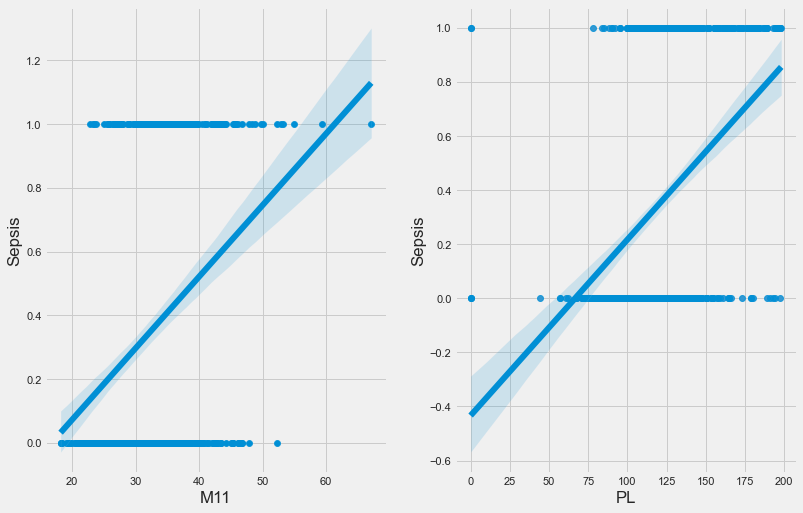

In [204]:
## Plot sizing. 
fig, (ax1, ax2) = plt.subplots(figsize = (12,8), ncols=2,sharey=False)
## Scatter plotting for Severity and Distance(mi).
sns.scatterplot( x = train['M11'], y = train.Sepsis,  ax=ax1)
## Putting a regression line. 
sns.regplot(x=train['M11'], y=train.Sepsis, ax=ax1)

## Scatter plotting for Severity and ['Wind_Speed(mph)'].
sns.scatterplot(x = train['PL'],y = train.Sepsis, ax=ax2, color='pink')
## regression line for MasVnrArea and Severity.
sns.regplot(x=train['PL'], y=train.Sepsis, ax=ax2);

C:\Users\William\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

C:\Users\William\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

C:\Users\William\anaconda3\lib\site-packages\seaborn\_core.py:1326: UserWarning:

Vertical orientation ignored with only `x` specified.



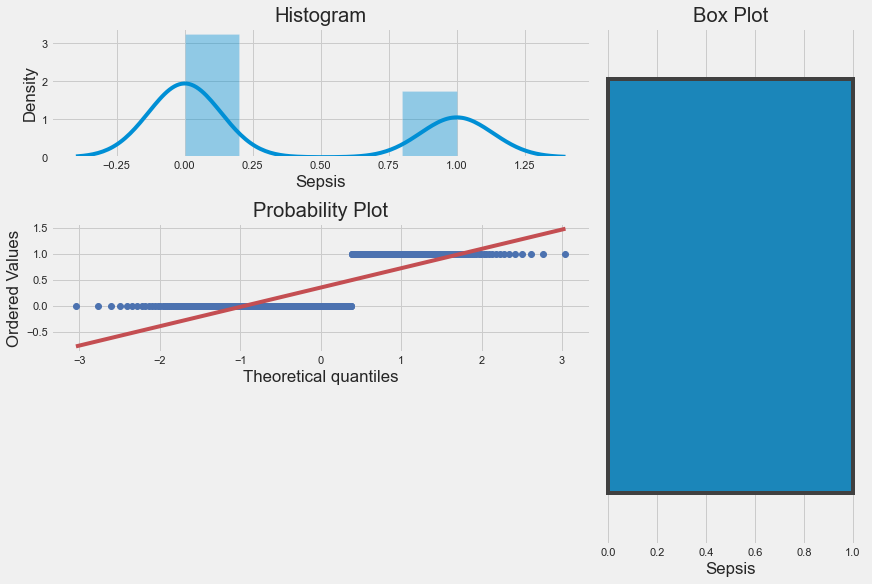

In [205]:
plotting_3_chart(train, 'Sepsis')

 ##  ❓<span style="color:blue ">OBSERVATION: </span>
 

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
             No feature have missing values.
</p>
</div>


***


C:\Users\William\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).




 mu = 0.35 and sigma = 0.48



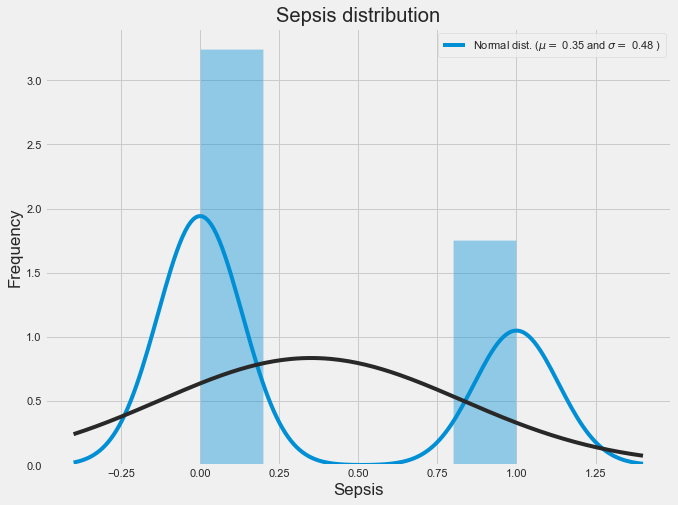

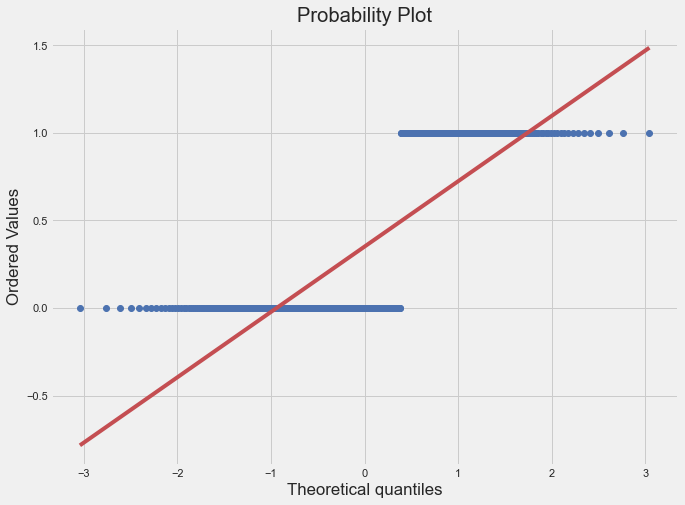

In [206]:
from scipy import stats
from scipy.stats import norm, skew #for some statistics

sns.distplot(train['Sepsis'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(train['Sepsis'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Sepsis distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(train['Sepsis'], plot=plt)
plt.show()

As you can see, the log transformation removes the normality of errors, which solves most of the other errors we talked about above. Let's make a comparison of the pre-transformed and post-transformed state of residual plots. 

> Here, we see that the pre-transformed chart on the left has heteroscedasticity, and the post-transformed chart on the right has Homoscedasticity(almost an equal amount of variance across the zero lines). It looks like a blob of data points and doesn't seem to give away any relationships. That's the sort of relationship we would like to see to avoid some of these assumptions. 

# Data Correlation

As we examined these scatter plots, I thought it was time to explain the Multiple Linear Regression assumptions. Before constructing a multiple linear regression model, we must ensure that the following assumptions are correct.

Already, we can observe some potentially intriguing correlations between the objective variable (the number of fatal accidents) and the feature variables (the remaining three columns).

The Pearson correlation coefficient matrix may be used to quantify the pairwise associations shown in the scatter plots. The Pearson correlation coefficient is one of the most often used methods for quantifying correlation between variables, and the following criteria are frequently employed by convention:

0.2 = weak
0.5 = medium
0.8 = strong
0.9 = very strong

In [207]:
train.describe() 

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepsis
count,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000,590.000000
mean,3.835593,120.467797,69.383051,20.798305,80.522034,32.406949,0.481976,33.398305,0.686441,0.350847
std,3.367439,32.765279,18.156714,15.980729,117.092357,7.021781,0.334917,11.821781,0.464333,0.477640
min,0.000000,0.000000,0.000000,0.000000,0.000000,18.200000,0.078000,21.000000,0.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.325000,0.249000,24.000000,0.000000,0.000000
50%,3.000000,116.500000,70.000000,23.000000,39.000000,32.000000,0.388500,29.000000,1.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,125.750000,36.600000,0.650750,40.000000,1.000000,1.000000
max,17.000000,198.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000,1.000000


In [208]:
# compare sepsis level rate across numerical columns
pd.pivot_table(train, index = 'Sepsis', values = ['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age', 'Insurance', 'Sepsis'])

,Age,BD2,Insurance,M11,PL,PR,PRG,SK,TS
Sepsis,,,,,,,,,
0,31.660574,0.436157,0.665796,30.704700,109.715405,68.926893,3.334204,19.971279,68.234987
1,36.613527,0.566754,0.724638,35.556522,140.362319,70.227053,4.763285,22.328502,103.256039


 ##  ❓<span style="color:blue ">OBSERVATION: </span>
 

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
             > Multiple value for different column
</p>
</div>


***


# c. Categorical Variables

> I decided to filter some impossible value like some patient is 0 weight or outlier is too far a away

## M11 filter Groupby

In [209]:
# Filter m11 using groupby
train.loc[(train["M11"] == 0), 'M11'] = np.nan
train['M11'] = train.groupby('Age')['M11'].apply(lambda x: x.fillna(x.median()))

## SK

In [210]:
# Filter SK using groupby
train.loc[(train["SK"] >90), 'SK'] = np.nan
train['SK'] = train.groupby('Age')['SK'].apply(lambda x: x.fillna(x.median()))

### PL

In [211]:
# Filter pl using groupby
train.loc[(train["PL"] == 0), 'PL'] = np.nan
train['PL'] = train.groupby('Age')['PL'].apply(lambda x: x.fillna(x.median()))

##  TS

In [212]:
# Filter SK using groupby
train.loc[(train["TS"] >650), 'TS'] = np.nan
train['TS'] = train.groupby('Age')['TS'].apply(lambda x: x.fillna(x.median()))

## Remove PR with 0 value

In [213]:
test.loc[(test["PR"] == 0), 'PR'] = test["PR"].mean()
train.loc[(train["PR"] == 0), 'PR'] = train["PR"].mean()

## Remove M11 with 0 value

In [214]:
test.loc[(test["M11"] == 0), 'PR'] = test["M11"].mean()
train.loc[(train["M11"] == 0), 'PR'] = train["M11"].mean()

# Check data has been filter yet

<AxesSubplot:>

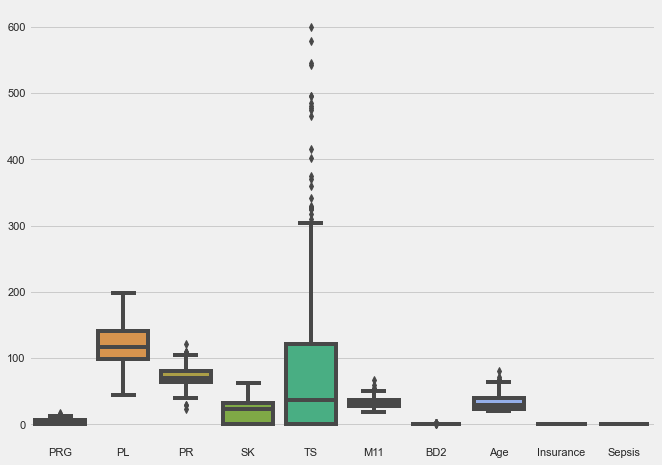

In [215]:
plt.rcParams['figure.figsize'] = [10,7.5]
sns.boxplot(data=train, orient="v")


 ##  ❓<span style="color:blue ">OBSERVATION: </span>
 

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#3D3D3D;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:#FFD154;">
The data has been filtered to more possible value
</p>
</div>


***


In [216]:
# Outlier detection 
from collections import Counter

def detect_outliers(df,n,features):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than n outliers according
    to the Tukey method.
    """
    outlier_indices = []
    
    # iterate over features(columns)
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index
        
        # append the found outlier indices for col to the list of outlier indices 
        outlier_indices.extend(outlier_list_col)
        
    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n )
    
    return multiple_outliers   

# detect outliers from Age, SibSp , Parch and Fare
Outliers_to_drop = detect_outliers(train,2,["Age","M11","BD2"])

In [217]:
train.loc[Outliers_to_drop] # Show the outliers rows

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepsis


# No outliner

 ##  ❓<span style="color:blue ">OBSERVATION: </span>

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
             - There is no missing value
</p>
</div>


***

#  3. Check corelation for dropping
***

In [218]:
corelation = train.corr()

C:\Users\William\AppData\Local\Temp/ipykernel_15824/4104708637.py:3: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



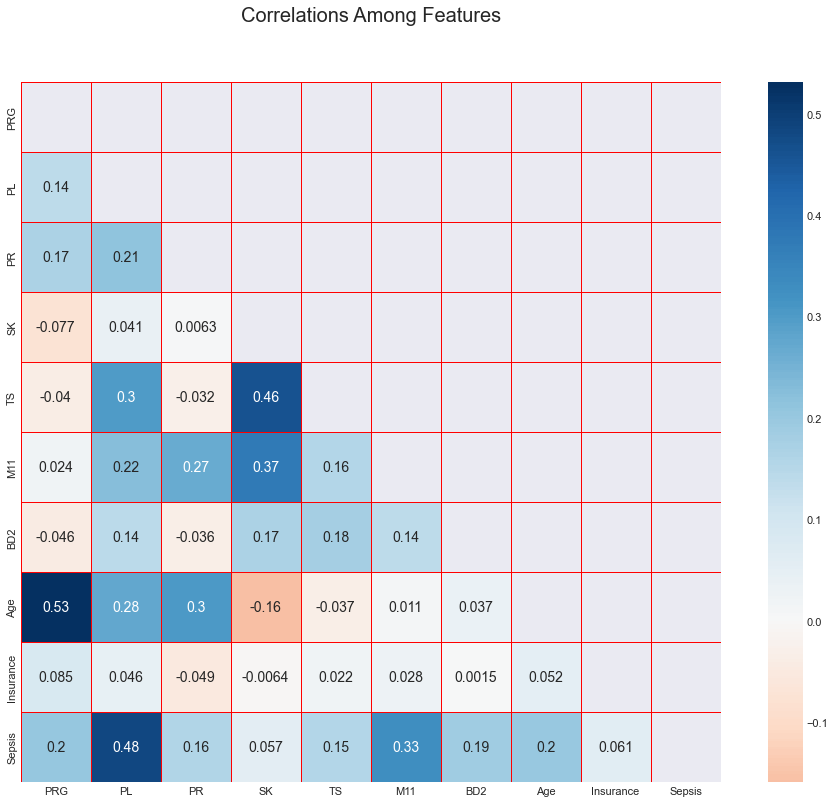

In [219]:
import matplotlib.style as style
import numpy as np
mask = np.zeros_like(train.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.set_style('darkgrid')
plt.subplots(figsize = (15,12))
sns.heatmap(train.corr(), 
            annot=True,
            mask = mask,
            cmap = 'RdBu', ## in order to reverse the bar replace "RdBu" with "RdBu_r"
            linewidths=.9, 
            linecolor='red',
            fmt='.2g',
            center = 0,
            square=True)
plt.title("Correlations Among Features", y = 1.03,fontsize = 20, pad = 40);

## ❓ <span style="color:blue "> OBSERVATION : </span>
 
<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#5642C5;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:white;">
             All corelation is under 50% so all data is fine
</p>
</div>



In [220]:
print (train.info())
print ("*"*40)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 590 entries, 0 to 598
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PRG        590 non-null    int64  
 1   PL         590 non-null    float64
 2   PR         590 non-null    float64
 3   SK         590 non-null    float64
 4   TS         590 non-null    float64
 5   M11        590 non-null    float64
 6   BD2        590 non-null    float64
 7   Age        590 non-null    int64  
 8   Insurance  590 non-null    int64  
 9   Sepsis     590 non-null    int32  
dtypes: float64(6), int32(1), int64(3)
memory usage: 64.6 KB
None
****************************************


 ##  ❓<span style="color:blue ">OBSERVATION: </span>
 

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#3D3D3D;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:#FFD154;">
We may dont have missing values in our features
</p>
</div>


***


# Encoding

In [221]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 590 entries, 0 to 598
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   PRG        590 non-null    int64  
 1   PL         590 non-null    float64
 2   PR         590 non-null    float64
 3   SK         590 non-null    float64
 4   TS         590 non-null    float64
 5   M11        590 non-null    float64
 6   BD2        590 non-null    float64
 7   Age        590 non-null    int64  
 8   Insurance  590 non-null    int64  
 9   Sepsis     590 non-null    int32  
dtypes: float64(6), int32(1), int64(3)
memory usage: 64.6 KB


In [222]:
%%time
from statsmodels.formula.api import ols

# Rename the copy DataFrame to fit into stats model
data1 = train.rename(columns={'PRG': 'PRG', 'PL': 'PL', 'PR': 'PR', 'SK': 'SK', 'TS': 'TS', 'M11': 'M11', 'BD2': 'BD2', 'Age': 'Age'})

formula = 'Sepsis ~ '+ '+'.join(data1.columns[1:])

model = ols(formula='Sepsis ~ PRG+PL+PR+SK+TS+M11+BD2+Age', data=data1).fit()
model.summary()

Wall time: 46.1 ms


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Sepsis   R-squared:                       0.318
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                     33.84
Date:                Sat, 09 Apr 2022   Prob (F-statistic):           7.47e-44
Time:                        22:02:18   Log-Likelihood:                -287.87
No. Observations:                 590   AIC:                             593.7
Df Residuals:                     581   BIC:                             633.2
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.0266      0.120     -8.575      0.000      -1.262      -0.791
PRG            0.0204      0.006      3.543      0.000       0.009       0.032
PL             0.0061      0.001     10.003      0.000       0.005       0.007
PR            -0.0004      0.002     -0.254      0.799      -0.003       0.003
SK            -0.0020      0.001     -1.529      0.127      -0.005       0.001
TS          5.515e-05      0.000      0.298      0.765      -0.000       0.000
M11            0.0169      0.003      6.297      0.000       0.012       0.022
BD2            0.1583      0.051      3.122      0.002       0.059       0.258
Age         8.775e-05      0.002      0.050      0.960      -0.003       0.004
==============================================================================
Omnibus:                       26.921   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               19.592
Skew:                           0.340   Prob(JB):                     5.57e-05
Kurtosis:                       2.422   Cond. No.                     1.33e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.33e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

 ##  ❓<span style="color:blue ">OBSERVATION: </span>
 
### Interpretation of the Model Coefficient, the P-value, the R-squared

> The output above shows that, when the other variables remain constant, if we compare two applicants whose 'M11' differ by one unit, the applicant with higher 'M11' will, on average, have 0.011 units higher 'Income'.
> Using the P>|t| result, I can infer that the variables all independent variables are the statistically significant variables, as their p-value is less than 0.8.
> The Adj. R-squared 0.408 indicates the amount of variability not being explained by my model that much

<hr>


## Train - Test - Validation

## 2.3 Drop column ID and Insurance
>Drop Insurance follow the requirement

In [223]:
train = train.drop(columns=['Insurance'])
test = test.drop(columns=['Insurance'])


### Splitting dataset into X and Y

In [224]:
X = train.drop(['Sepsis'], axis = 1)
y = train["Sepsis"]

## Check data 

In [225]:
X.head()

,PRG,PL,PR,SK,TS,M11,BD2,Age
0,6,148.0,72.0,35.0,0.0,33.6,0.627,50
1,1,85.0,66.0,29.0,0.0,26.6,0.351,31
2,8,183.0,64.0,0.0,0.0,23.3,0.672,32
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33


In [226]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Sepsis, dtype: int32

In [227]:
test.shape

(167, 9)

In [228]:
test.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age
0,ICU200609,1,109,38.000000,18,120,23.1,0.407,26
1,ICU200610,1,108,88.000000,19,0,27.1,0.400,24
2,ICU200611,6,96,70.778443,0,0,23.7,0.190,28
3,ICU200612,1,124,74.000000,36,0,27.8,0.100,30
4,ICU200613,7,150,78.000000,29,126,35.2,0.692,54


# Imbalance Class
This bias in the training dataset can impact various machine learning algorithms, causing some to completely disregard the minority class. This is a concern since projections are often based on the minority class.

One method for dealing with class imbalance is to randomly resample the training dataset. The two basic methods for randomly resampling an unbalanced dataset are to eliminate instances from the majority class, which is known as undersampling, and to duplicate examples from the minority class, which is known as oversampling.

In [229]:
from imblearn.over_sampling import SMOTE
print(Counter(y))
sm = SMOTE(random_state=42, sampling_strategy=0.9)
X, y = sm.fit_resample(X, y)
print(Counter(y))

Counter({0: 383, 1: 207})
Counter({0: 383, 1: 344})


In [230]:
from imblearn.over_sampling import RandomOverSampler
# define oversampling strategy
oversample = RandomOverSampler(random_state=42, sampling_strategy='minority')
print(Counter(y))
# fit and apply the transform
X, y = oversample.fit_resample(X, y)
# summarize class distribution

print(Counter(y))

Counter({0: 383, 1: 344})
Counter({1: 383, 0: 383})


<h1 style="color:blue;text-align:center;" > ❓ CONCLUSION: </h1>
 
> 1. Patient tends to have positive Sepsis when they are > 30

>2. Dataset cointains more people got negative Sepsis

>3. Patient is obsese can also get positive Sepsis

>4. PL, PR , SK , TS is high outlier patients are more likely get Sepsis

>5. Old age can also get people have Sepsis and vice vesa



<a id="3"></a> <h1 style="color:red;font-size:40px;font-family:Georgia;text-align:center;"><strong>3. Model Traning </strong></h1>
 

## I choose 3 model of this assignment : 
> Decision Tree

> Logistic Regression

> Random Forest

# Spliting data

In [231]:
from sklearn.model_selection import train_test_split
seed = 42
X_train , X_test ,y_train ,y_test = train_test_split(X,y , train_size = 0.7 , test_size = 0.3 , random_state=42)


In [232]:
from sklearn.preprocessing import RobustScaler
st_scale = RobustScaler()

X_train = st_scale.fit_transform(X_train)
X_test = st_scale.fit_transform(X_test)


In [233]:
"""See the dimensions of input and output data set."""
print(f"Input Matrix Dimension: {X_train.shape}")
print(f"Output Vector Dimension: {y_train.shape}")
print(f"Test Data Dimension: {X_test.shape}")

Input Matrix Dimension: (536, 8)
Output Vector Dimension: (536,)
Test Data Dimension: (230, 8)


In [234]:
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

# 🌲 Decision Tree
What is Decision Tree?
> covering both classification and regression.

> A decision tree can be used to visually and explicitly represent decisions and decision making

>it uses a tree-like model of decisions
## CART's Benefits
- Simple to comprehend, interpret, and visualize.
- Decision trees execute variable screening or feature selection implicitly.
- Can handle numerical as well as categorical data. Can also deal with multi-output issues.
- Users must put in minimum effort to prepare data for decision trees.
- The performance of a tree is unaffected by nonlinear interactions between parameters.

## CART's disadvantages

- Decision-tree learners might produce too complicated trees that do not generalize well to new data. This is referred to as -overfitting.
- Decision trees can be unstable because little changes in the data might result in the generation of an entirely new tree. ----This is known as variance, and it must be reduced using techniques such as bagging and boosting.
-Greedy algorithms cannot ensure that they will yield the best decision tree in the world. This may be avoided by training --several trees with randomly sampled features and samples with replacement.
-If some classes dominate, decision tree learners produce biased trees. It is consequently advised that the data set be balanced before fitting with the decision tree.

![Decision tree](https://miro.medium.com/max/720/1*XMId5sJqPtm8-RIwVVz2tg.png)

***

# Cross Validation
Assume we'll utilize 10-fold cross validation. So k = 10, and there are a total of 599 observations. There would be 599/10 = 59.1 observations in each fold. Basically, k-fold cross validation estimates test accuracy by using fold-1 (59.1 samples) as the testing set and k-1 (9 folds) as the training set. This technique is done k times (if k = 10, then 10 times), with each repetition using a new subset of observations as a validation or test set. This procedure yields k estimates of test accuracy, which are then averaged.

In [235]:
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score
cv = StratifiedShuffleSplit(n_splits = 10, test_size = .25, random_state = 0 ) # run model 10x with 60/30 split intentionally leaving out 10%
## Using robust scale for the whole dataset.

## saving the feature names for decision tree display
column_names = X.columns

X = st_scale.fit_transform(X)
accuracies = cross_val_score(LogisticRegression(solver='liblinear'), X,y, cv  = cv)
print ("Cross-Validation accuracy scores:{}".format(accuracies))
print ("Mean Cross-Validation accuracy score: {}".format(round(accuracies.mean(),5)))

Cross-Validation accuracy scores:[0.74479167 0.73958333 0.75520833 0.77083333 0.74479167 0.734375
 0.71354167 0.70833333 0.75       0.74479167]
Mean Cross-Validation accuracy score: 0.74063


## Initialize Decision Tree model

In [236]:
"""#6.Decision Tree Classifier"""
dt = DecisionTreeClassifier(random_state = seed)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)

In [237]:
f1_score(y_test, y_pred)


0.6976744186046511

## Hypertunning 


In [238]:
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold
"""For DT, the following hyperparameters are usually tunned."""

'For DT, the following hyperparameters are usually tunned.'

In [239]:
# helper function
def plot_confusionmatrix(y_train_pred,y_train,dom):
    print(f'{dom} Confusion matrix')

    cf = confusion_matrix(y_train_pred,y_train)
    sns.heatmap(cf,annot=True,yticklabels=['Positive','Negative']
               ,xticklabels=['Positive','Negative'],cmap='Blues', fmt='g')
    plt.tight_layout()
    plt.xlabel('Predicted',fontsize = 25)
    plt.ylabel('True',fontsize = 25)
    plt.show()


In [240]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.66      0.83      0.73       109
           1       0.80      0.62      0.70       121

    accuracy                           0.72       230
   macro avg       0.73      0.72      0.72       230
weighted avg       0.73      0.72      0.72       230



In [241]:
path = dt.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
print(ccp_alphas)

[0.         0.00173241 0.00177239 0.00177683 0.00177683 0.00178087
 0.00180737 0.00183939 0.0018647  0.00248756 0.00279851 0.00279851
 0.00298507 0.00298507 0.00298507 0.0030614  0.00309014 0.00315091
 0.00315729 0.00319829 0.00326493 0.00334266 0.00339213 0.00350011
 0.00355366 0.00356174 0.00359315 0.00373134 0.00381652 0.00383111
 0.00392608 0.00396213 0.00475464 0.00499845 0.00501658 0.00503439
 0.00534745 0.00556142 0.00563033 0.00625929 0.00722456 0.00758114
 0.00811572 0.00816938 0.00833214 0.00922825 0.02299684 0.02579363
 0.02734261 0.03098547 0.09095449]


# Decision tree pruning
Pruning is a data compression method used in machine learning and search algorithms to minimize the size of decision trees by deleting non-critical and redundant portions of the tree used to categorize instances. Pruning minimizes the final classifier's complexity, which increases predicted accuracy by reducing overfitting.

In [242]:
# For each alpha we will append our model to a list
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

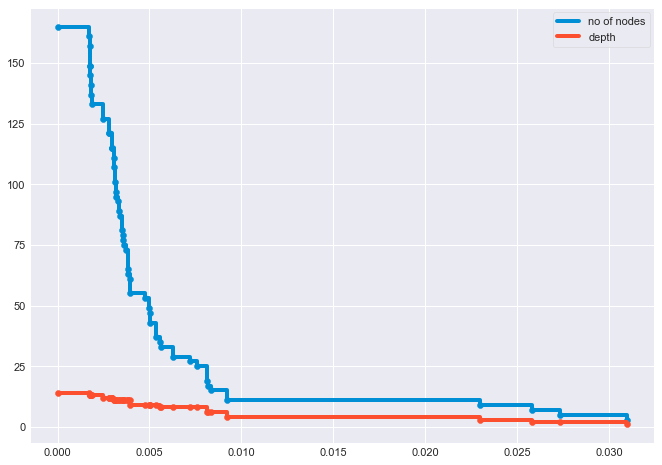

In [243]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
plt.scatter(ccp_alphas,node_counts)
plt.scatter(ccp_alphas,depth)
plt.plot(ccp_alphas,node_counts,label='no of nodes',drawstyle="steps-post")
plt.plot(ccp_alphas,depth,label='depth',drawstyle="steps-post")
plt.legend()
plt.show()

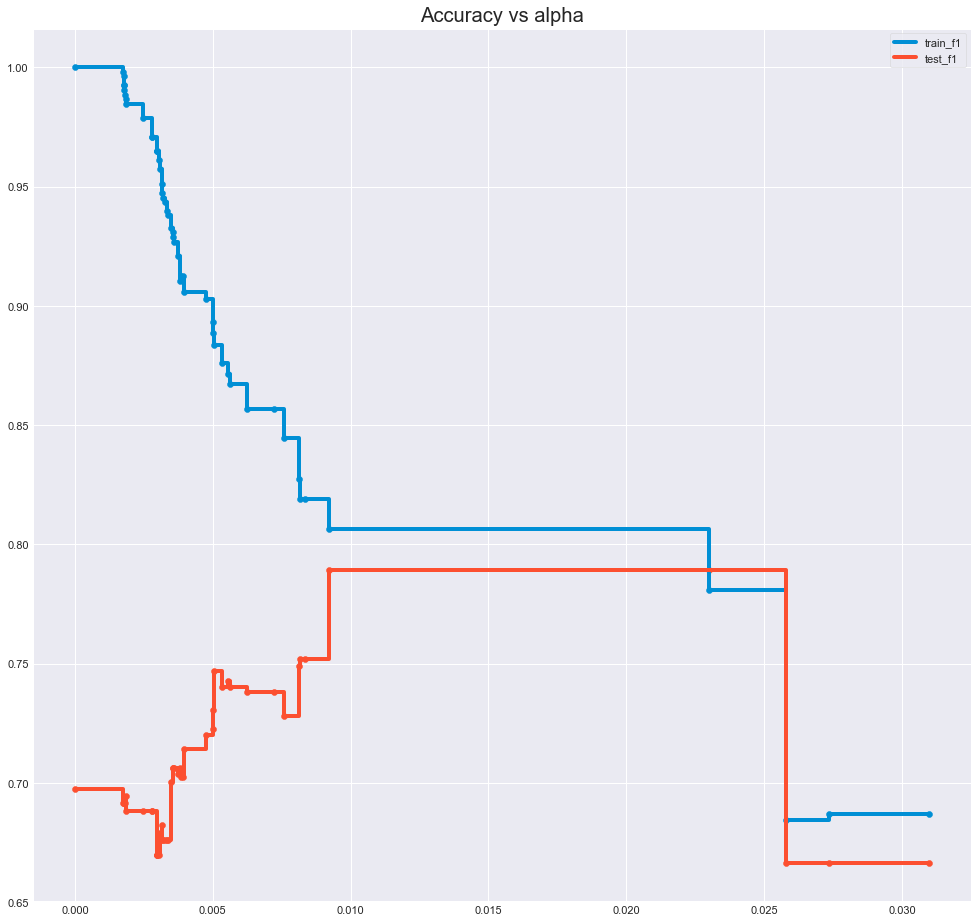

In [244]:
train_acc = []
test_acc = []
for c in clfs:
    y_train_pred = c.predict(X_train)
    y_test_pred = c.predict(X_test)
    train_acc.append(f1_score(y_train_pred,y_train))
    test_acc.append(f1_score(y_test_pred,y_test))
plt.figure(figsize=(15,15))
plt.scatter(ccp_alphas,train_acc)
plt.scatter(ccp_alphas,test_acc)
plt.plot(ccp_alphas,train_acc,label='train_f1',drawstyle="steps-post")
plt.plot(ccp_alphas,test_acc,label='test_f1',drawstyle="steps-post")
plt.legend()
plt.title('Accuracy vs alpha')
plt.show()

# Confusion matrix
***

When we obtain the data, after cleaning, pre-processing, and wrangling it, the first thing we do is feed it to an excellent model and, of course, get the results in probabilities. But wait a minute! How in the world are we going to assess the efficacy of our model? Higher effectiveness equals better performance, and that is precisely what we seek. And here is when the Confusion matrix comes into play. Confusion Matrix is a machine learning classification performance metric.

Train Confusion matrix


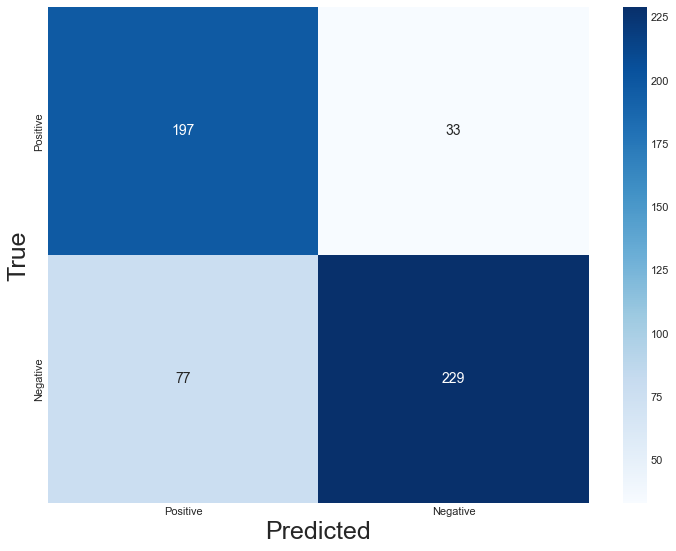

Test Confusion matrix


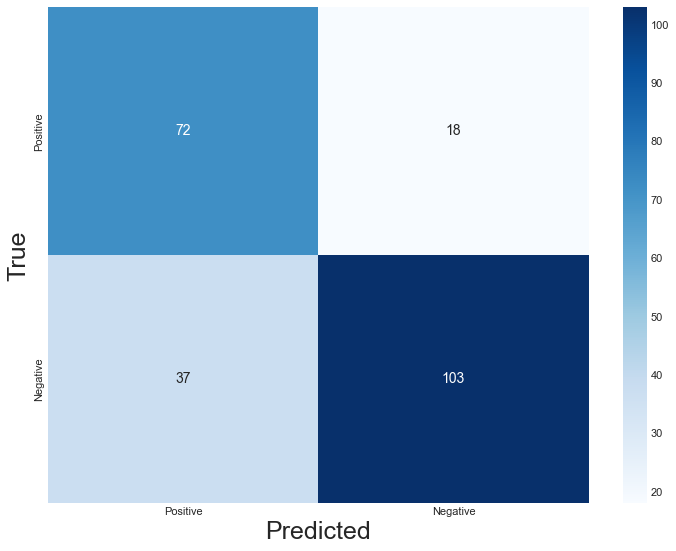

In [245]:
clf_ = DecisionTreeClassifier(random_state=42,ccp_alpha=0.01)
clf_.fit(X_train,y_train)
y_train_pred = clf_.predict(X_train)
y_test_pred = clf_.predict(X_test)

plot_confusionmatrix(y_train_pred,y_train,dom='Train')
plot_confusionmatrix(y_test_pred,y_test,dom='Test')

In [246]:
train_acc = f1_score(y_train, y_train_pred)
test_acc = f1_score(y_test, y_test_pred)
print("Train F1 score: " + str(train_acc))
print("Test F1 score: " + str(test_acc))

Train F1 score: 0.806338028169014
Test F1 score: 0.7892720306513411


In [247]:
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.80      0.66      0.72       109
           1       0.74      0.85      0.79       121

    accuracy                           0.76       230
   macro avg       0.77      0.76      0.76       230
weighted avg       0.77      0.76      0.76       230



In [248]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.86      0.72      0.78       274
           1       0.75      0.87      0.81       262

    accuracy                           0.79       536
   macro avg       0.80      0.80      0.79       536
weighted avg       0.80      0.79      0.79       536



 ##  ❓<span style="color:blue ">OBSERVATION: </span>
 

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#3D3D3D;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:#FFD154;">
There is lots of false positive and negative which leads to low f1-score so I decide to tune hyperparemeter a bit luckyly I do not get any overfit
</p>
</div>


# Gridsearch
By using gridsearch we can get the best parem of the model by go through all the setting

In [249]:
dtparams = {'max_depth': [2,4,6,8,10,20,None],
         'min_samples_split': [2,3,4],
         'min_samples_leaf': [5, 10, 20, 50, 100],
           'criterion': ["gini", "entropy"]}
cv = StratifiedShuffleSplit(n_splits = 10, test_size = .25)
gcv = GridSearchCV(estimator=dt,param_grid=dtparams,cv=cv, n_jobs=-1, verbose=1, scoring = "f1")
gcv.fit(X_train,y_train)

Fitting 10 folds for each of 210 candidates, totalling 2100 fits


GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=None, test_size=0.25,
            train_size=None),
             estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 20, None],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'min_samples_split': [2, 3, 4]},
             scoring='f1', verbose=1)

In [250]:
## Getting the best of everything. 
print (gcv.best_score_)
print (gcv.best_params_)
print(gcv.best_estimator_)

0.7473446350951589
{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 20, 'min_samples_split': 2}
DecisionTreeClassifier(max_depth=4, min_samples_leaf=20, random_state=42)


 ##  ❓<span style="color:blue ">OBSERVATION: </span>
 

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#3D3D3D;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:#FFD154;">
As the observation , I get the best score is .76 F1-score and the best paremeter DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=5,
                       random_state=42)
</p>
</div>


# Hyperparameters tuning
Let us now apply Grid Search to all of the classifiers in the goal of refining their hyperparameters and therefore boosting their accuracy. Are the model's default settings the best bet? Let us investigate.

In [251]:
train_results_total = [] # Store train accuracy results
test_results_total = []  # Store test accuracy results


In [252]:
from sklearn.metrics import f1_score
train_results = [] # Store train accuracy results
test_results = []  # Store test accuracy results
for max_depth in range(1,30):

   decisionTree =DecisionTreeClassifier(criterion = 'entropy',
                                        max_depth = max_depth,ccp_alpha = 0.01 )
   decisionTree.fit(X_train, y_train)
   train_pred = decisionTree.predict(X_train)
   train_acc = f1_score(y_train, train_pred)
   # Add accuracy score to previous train results
   train_results.append(train_acc)

   #test
   test_pred = decisionTree.predict(X_test)
   test_acc = f1_score(y_test, test_pred)
   # Add auc score to previous test results
   test_results.append(test_acc)
   train_results_total.append(train_acc)
   test_results_total.append(test_acc)

   print('The Training f1 Accuracy for max_depth {} is:'.format(max_depth), train_acc)
   print('The Test f1 Accuracy for max_depth {} is:'.format(max_depth), test_acc)


The Training f1 Accuracy for max_depth 1 is: 0.6869918699186992
The Test f1 Accuracy for max_depth 1 is: 0.6666666666666667
The Training f1 Accuracy for max_depth 2 is: 0.6844444444444445
The Test f1 Accuracy for max_depth 2 is: 0.6666666666666667
The Training f1 Accuracy for max_depth 3 is: 0.7903225806451611
The Test f1 Accuracy for max_depth 3 is: 0.8129496402877698
The Training f1 Accuracy for max_depth 4 is: 0.8187919463087249
The Test f1 Accuracy for max_depth 4 is: 0.8088235294117647
The Training f1 Accuracy for max_depth 5 is: 0.8090737240075615
The Test f1 Accuracy for max_depth 5 is: 0.7796610169491527
The Training f1 Accuracy for max_depth 6 is: 0.8469387755102041
The Test f1 Accuracy for max_depth 6 is: 0.8060836501901141
The Training f1 Accuracy for max_depth 7 is: 0.8643761301989149
The Test f1 Accuracy for max_depth 7 is: 0.7319148936170212
The Training f1 Accuracy for max_depth 8 is: 0.8725314183123879
The Test f1 Accuracy for max_depth 8 is: 0.7288135593220338
The Trai

In [253]:
from sklearn.metrics import f1_score
max_depths = np.linspace(1, 5, 5, endpoint=True) # List of values for tuning
train_results = [] # Store train accuracy results
test_results = []  # Store test accuracy results
for max_depth in range(2,31):

   decisionTree =DecisionTreeClassifier(criterion = 'entropy',
                                        max_depth = 6,
                                       ccp_alpha = 0.01,min_samples_leaf=5, 
                                              min_samples_split=max_depth, random_state=42 )
   decisionTree.fit(X_train, y_train)
   train_pred = decisionTree.predict(X_train)
   train_acc = f1_score(y_train, train_pred)
   # Add accuracy score to previous train results
   train_results.append(train_acc)

   #test
   test_pred = decisionTree.predict(X_test)
   test_acc = f1_score(y_test, test_pred)
   # Add auc score to previous test results
   test_results.append(test_acc)
   train_results_total.append(train_acc)
   test_results_total.append(test_acc)

   print('The Training f1 Accuracy for max_depth {} is:'.format(max_depth), train_acc)
   print('The Test f1 Accuracy for max_depth {} is:'.format(max_depth), test_acc)



The Training f1 Accuracy for max_depth 2 is: 0.8421052631578948
The Test f1 Accuracy for max_depth 2 is: 0.8195488721804511
The Training f1 Accuracy for max_depth 3 is: 0.8421052631578948
The Test f1 Accuracy for max_depth 3 is: 0.8195488721804511
The Training f1 Accuracy for max_depth 4 is: 0.8421052631578948
The Test f1 Accuracy for max_depth 4 is: 0.8195488721804511
The Training f1 Accuracy for max_depth 5 is: 0.8421052631578948
The Test f1 Accuracy for max_depth 5 is: 0.8195488721804511
The Training f1 Accuracy for max_depth 6 is: 0.8421052631578948
The Test f1 Accuracy for max_depth 6 is: 0.8195488721804511
The Training f1 Accuracy for max_depth 7 is: 0.8421052631578948
The Test f1 Accuracy for max_depth 7 is: 0.8195488721804511
The Training f1 Accuracy for max_depth 8 is: 0.8421052631578948
The Test f1 Accuracy for max_depth 8 is: 0.8195488721804511
The Training f1 Accuracy for max_depth 9 is: 0.8421052631578948
The Test f1 Accuracy for max_depth 9 is: 0.8195488721804511
The Trai

In [254]:
from sklearn.metrics import f1_score
train_results = [] # Store train accuracy results
test_results = []  # Store test accuracy results
for max_depth in range(1,30):
   decisionTree = DecisionTreeClassifier(criterion = 'entropy',
                                        max_depth = 6,
                                       ccp_alpha = 0.01,min_samples_leaf=5, 
                                              min_samples_split=3, random_state=42 )
   decisionTree.fit(X_train, y_train)
   train_pred = decisionTree.predict(X_train)
   train_acc = f1_score(y_train, train_pred)
   # Add accuracy score to previous train results
   train_results.append(train_acc)
   train_results_total.append(train_acc)
   test_results_total.append(test_acc)

   #test
   test_pred = decisionTree.predict(X_test)
   test_acc = f1_score(y_test, test_pred)
   # Add auc score to previous test results
   test_results.append(test_acc)
   print('The Training f1 Accuracy for max_depth {} is:'.format(max_depth), train_acc)
   print('The Test f1 Accuracy for max_depth {} is:'.format(max_depth), test_acc)


The Training f1 Accuracy for max_depth 1 is: 0.8421052631578948
The Test f1 Accuracy for max_depth 1 is: 0.8195488721804511
The Training f1 Accuracy for max_depth 2 is: 0.8421052631578948
The Test f1 Accuracy for max_depth 2 is: 0.8195488721804511
The Training f1 Accuracy for max_depth 3 is: 0.8421052631578948
The Test f1 Accuracy for max_depth 3 is: 0.8195488721804511
The Training f1 Accuracy for max_depth 4 is: 0.8421052631578948
The Test f1 Accuracy for max_depth 4 is: 0.8195488721804511
The Training f1 Accuracy for max_depth 5 is: 0.8421052631578948
The Test f1 Accuracy for max_depth 5 is: 0.8195488721804511
The Training f1 Accuracy for max_depth 6 is: 0.8421052631578948
The Test f1 Accuracy for max_depth 6 is: 0.8195488721804511
The Training f1 Accuracy for max_depth 7 is: 0.8421052631578948
The Test f1 Accuracy for max_depth 7 is: 0.8195488721804511
The Training f1 Accuracy for max_depth 8 is: 0.8421052631578948
The Test f1 Accuracy for max_depth 8 is: 0.8195488721804511
The Trai

In [255]:
from sklearn.metrics import f1_score
max_depths = np.linspace(1, 1, 1, endpoint=True) # List of values for tuning
train_results = [] # Store train accuracy results
test_results = []  # Store test accuracy results
for max_depth in range(2,30):
   decisionTree =DecisionTreeClassifier(criterion = 'gini',
                                        max_depth = 6,
                                       ccp_alpha = 0.01,min_samples_leaf=5, 
                                              min_samples_split=3, random_state=42, max_leaf_nodes=max_depth )
   decisionTree.fit(X_train, y_train)
   train_pred = decisionTree.predict(X_train)
   train_acc = f1_score(y_train, train_pred)
   # Add accuracy score to previous train results
   train_results.append(train_acc)

   #test
   test_pred = decisionTree.predict(X_test)
   test_acc = f1_score(y_test, test_pred)
   # Add auc score to previous test results
   test_results.append(test_acc)
   train_results_total.append(train_acc)
   test_results_total.append(test_acc)

   print('The Training f1 Accuracy for max_depth {} is:'.format(max_depth), train_acc)
   print('The Test f1 Accuracy for max_depth {} is:'.format(max_depth), test_acc)

The Training f1 Accuracy for max_depth 2 is: 0.6869918699186992
The Test f1 Accuracy for max_depth 2 is: 0.6666666666666667
The Training f1 Accuracy for max_depth 3 is: 0.6869918699186992
The Test f1 Accuracy for max_depth 3 is: 0.6666666666666667
The Training f1 Accuracy for max_depth 4 is: 0.6844444444444445
The Test f1 Accuracy for max_depth 4 is: 0.6666666666666667
The Training f1 Accuracy for max_depth 5 is: 0.7809847198641766
The Test f1 Accuracy for max_depth 5 is: 0.7894736842105263
The Training f1 Accuracy for max_depth 6 is: 0.806338028169014
The Test f1 Accuracy for max_depth 6 is: 0.7892720306513411
The Training f1 Accuracy for max_depth 7 is: 0.806338028169014
The Test f1 Accuracy for max_depth 7 is: 0.7892720306513411
The Training f1 Accuracy for max_depth 8 is: 0.806338028169014
The Test f1 Accuracy for max_depth 8 is: 0.7892720306513411
The Training f1 Accuracy for max_depth 9 is: 0.806338028169014
The Test f1 Accuracy for max_depth 9 is: 0.7892720306513411
The Training

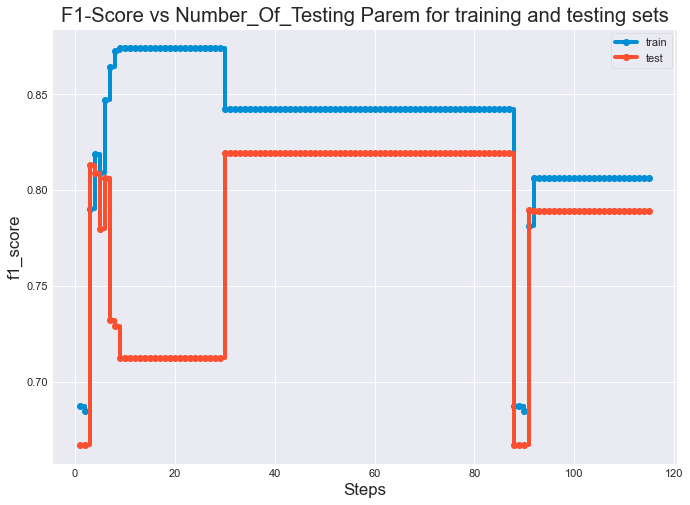

In [256]:
number = []
for i in range (1,len(train_results_total)+1):
    number.append(i)
max_depths = np.linspace(1, 32, 32, endpoint=True) # List of values for tuning
fig, ax = plt.subplots()
ax.set_xlabel("Steps")
ax.set_ylabel("f1_score")
ax.set_title("F1-Score vs Number_Of_Testing Parem for training and testing sets")
ax.plot(number, train_results_total, marker='o', label="train",drawstyle="steps-post")
ax.plot(number, test_results_total, marker='o', label="test",drawstyle="steps-post")
ax.legend()
plt.show()

# Final Paremeter Of Decision Tree

In [257]:
from sklearn.metrics import f1_score

decisionTree =DecisionTreeClassifier(criterion = 'entropy',
                                        max_depth = 6,
                                       ccp_alpha = 0.01,min_samples_leaf=5, 
                                              min_samples_split=3, random_state=42 )
decisionTree.fit(X_train, y_train)
train_pred = decisionTree.predict(X_train)
train_acc = f1_score(y_train, train_pred)
# Add accuracy score to previous train results
train_results.append(train_acc)

   #test
test_pred = decisionTree.predict(X_test)
test_acc = f1_score(y_test, test_pred)
   # Add auc score to previous test results
test_results.append(test_acc)


In [258]:
y_pred_decision_tree = test_pred

# F1 Score Decision Tree
We cannot select classifiers only on the basis of their accuracy or recall score. Rather, we must examine both to determine the optimal classifiers. The f1 score is the balanced harmonic mean of Recall and Precision, giving equal weight to both measurements. The greater the f1 score, the better.

In [259]:
train_acc = f1_score(y_train, train_pred)
test_acc = f1_score(y_test, test_pred)
print("Train F1 score: " + str(train_acc))
print("Test F1 score: " + str(test_acc))

Train F1 score: 0.8421052631578948
Test F1 score: 0.8195488721804511


Train Confusion matrix


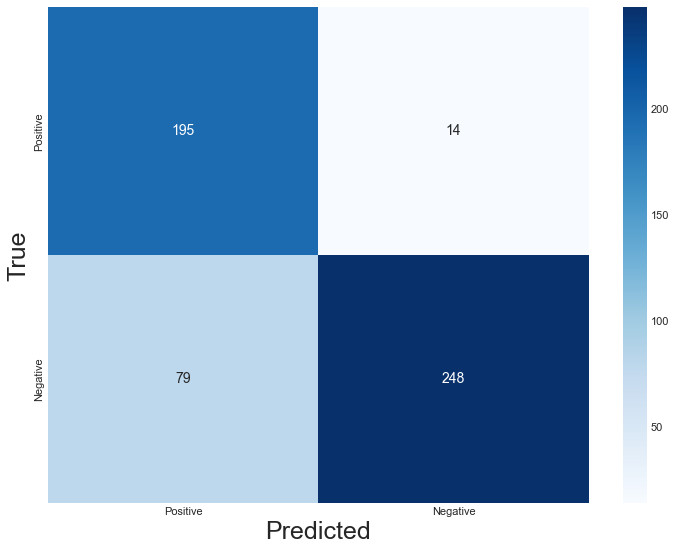

Test Confusion matrix


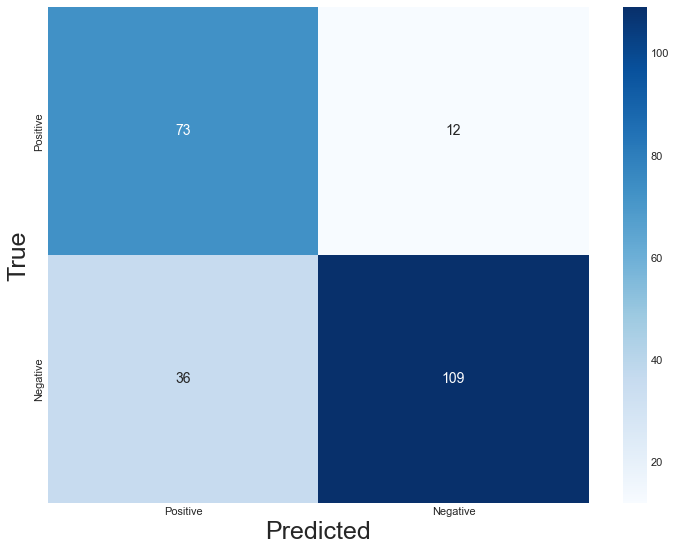

In [260]:
plot_confusionmatrix(train_pred,y_train,dom='Train')
plot_confusionmatrix(test_pred,y_test,dom='Test')

# Classification
Only true positives are connected with precision, recall, and f1 score. What if we wish to quantify genuine negatives? In a classification report, we may quantify them using true positives and the count of each class (0 and 1). It gives accuracy, recall, f1 score, and class count for both classes (0 and 1), but at a lower cost.

In [261]:
print(classification_report(y_train, train_pred))

              precision    recall  f1-score   support

           0       0.93      0.71      0.81       274
           1       0.76      0.95      0.84       262

    accuracy                           0.83       536
   macro avg       0.85      0.83      0.82       536
weighted avg       0.85      0.83      0.82       536



In [262]:
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.86      0.67      0.75       109
           1       0.75      0.90      0.82       121

    accuracy                           0.79       230
   macro avg       0.81      0.79      0.79       230
weighted avg       0.80      0.79      0.79       230



 ##  ❓<span style="color:blue ">OBSERVATION: </span>
 

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#3D3D3D;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:#FFD154;">
After hyperparameter tunning the f1-score got 81% train and 80% test . No overfit here and reach the highest f1_score possible
</p>
</div>

# 🖇 Logistic Regression

## Formula of logistic regression:

## $$ h = \theta_0 + \theta_1 x + \theta_2x + ... + \theta_nx \\ $$

* h = Hypothesis ℎ, with respect to weights $\theta$. 
* $\theta$ = weight of variable
* $x$ = Features/attributes. 

![logistic-regression-in-machine-learning.png](https://www.datasciencecentral.com/wp-content/uploads/2021/10/2808358994.png)

> I choose logistic regression because it works best on binary classification problem

***

In [263]:
"""#6.Decision Tree Classifier"""
lr = LogisticRegression(random_state = seed)
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

## Hypertunning 

In [264]:
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold
"""For DT, the following hyperparameters are usually tunned."""



'For DT, the following hyperparameters are usually tunned.'

In [265]:
# helper function
def plot_confusionmatrix(y_train_pred,y_train,dom):
    print(f'{dom} Confusion matrix')
    cf = confusion_matrix(y_train_pred,y_train)
    sns.heatmap(cf,annot=True,yticklabels=['Positive','Negative']
               ,xticklabels=['Positive','Negative'],cmap='Blues', fmt='g')
    plt.tight_layout()
    plt.show()


In [266]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.76      0.73       109
           1       0.77      0.71      0.74       121

    accuracy                           0.73       230
   macro avg       0.74      0.74      0.73       230
weighted avg       0.74      0.73      0.73       230



# Gridsearch

In [267]:
lrparams = {"penalty":["l1", "l2"],
            "solver":["newton-cg", "lbfgs", "liblinear", "sag", "saga"],
            "C": [0.001,0.01,0.1,1,10,100],
            "max_iter":[100,1000,2000,5000]}
cv = StratifiedShuffleSplit(n_splits = 10, test_size = .25)
gcv = GridSearchCV(estimator=lr,param_grid=lrparams,cv=cv, n_jobs=-1, verbose=1, scoring = "f1")
gcv.fit(X_train,y_train)

Fitting 10 folds for each of 240 candidates, totalling 2400 fits


C:\Users\William\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning:


720 fits failed out of a total of 2400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
240 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\William\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\William\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\William\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise Val

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=None, test_size=0.25,
            train_size=None),
             estimator=LogisticRegression(random_state=42), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 1000, 2000, 5000],
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             scoring='f1', verbose=1)

In [268]:
## Getting the best of everything. 
print (gcv.best_score_)
print (gcv.best_params_)
print(gcv.best_estimator_)

0.7347267899884505
{'C': 0.01, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
LogisticRegression(C=0.01, random_state=42, solver='liblinear')


In [269]:
train_results_total = [] # Store train accuracy results
test_results_total = []  # Store test accuracy results


In [270]:
train_acc = f1_score(y_train, train_pred)
test_acc = f1_score(y_test, test_pred)
print("Train F1 score: " + str(train_acc))
print("Test F1 score: " + str(test_acc))

Train F1 score: 0.8421052631578948
Test F1 score: 0.8195488721804511


In [271]:
from sklearn.metrics import f1_score
max_depths = np.linspace(1, 1, 2, endpoint=True) # List of values for tuning
train_results = [] # Store train accuracy results
test_results = []  # Store test accuracy results
for max_depth in range(1,3):
#     lr = LogisticRegression(C= .0001,penalty= 'l2',max_iter = 100,solver='liblinear')
   lr = LogisticRegression(C= .01,penalty= 'l2',max_iter = 100,solver='liblinear')
   lr.fit(X_train, y_train)
   train_pred = lr.predict(X_train)
   train_acc = f1_score(y_train, train_pred)
   # Add accuracy score to previous train results
   train_results.append(train_acc)

   #test
   test_pred = decisionTree.predict(X_test)
   test_acc = f1_score(y_test, test_pred)
   # Add auc score to previous test results
   test_results.append(test_acc)
   train_results_total.append(train_acc)
   test_results_total.append(test_acc)

   print('The Training f1 Accuracy for max_depth {} is:'.format(max_depth), train_acc)
   print('The Test f1 Accuracy for max_depth {} is:'.format(max_depth), test_acc)



The Training f1 Accuracy for max_depth 1 is: 0.731060606060606
The Test f1 Accuracy for max_depth 1 is: 0.8195488721804511
The Training f1 Accuracy for max_depth 2 is: 0.731060606060606
The Test f1 Accuracy for max_depth 2 is: 0.8195488721804511


In [272]:
from sklearn.metrics import f1_score
max_depths = np.linspace(1, 1, 2, endpoint=True) # List of values for tuning
train_results = [] # Store train accuracy results
test_results = []  # Store test accuracy results
for max_depth in range(1,3):
#     lr = LogisticRegression(C= .0001,penalty= 'l2',max_iter = 100,solver='liblinear')
   lr = LogisticRegression(C= .0001,penalty= 'l2',max_iter = 100,solver='liblinear')
   lr.fit(X_train, y_train)
   train_pred = lr.predict(X_train)
   train_acc = f1_score(y_train, train_pred)
   # Add accuracy score to previous train results
   train_results.append(train_acc)

   #test
   test_pred = decisionTree.predict(X_test)
   test_acc = f1_score(y_test, test_pred)
   # Add auc score to previous test results
   test_results.append(test_acc)
   train_results_total.append(train_acc)
   test_results_total.append(test_acc)
    
   print('The Training f1 Accuracy for max_depth {} is:'.format(max_depth), train_acc)
   print('The Test f1 Accuracy for max_depth {} is:'.format(max_depth), test_acc)


The Training f1 Accuracy for max_depth 1 is: 0.7403508771929824
The Test f1 Accuracy for max_depth 1 is: 0.8195488721804511
The Training f1 Accuracy for max_depth 2 is: 0.7403508771929824
The Test f1 Accuracy for max_depth 2 is: 0.8195488721804511


Train Confusion matrix


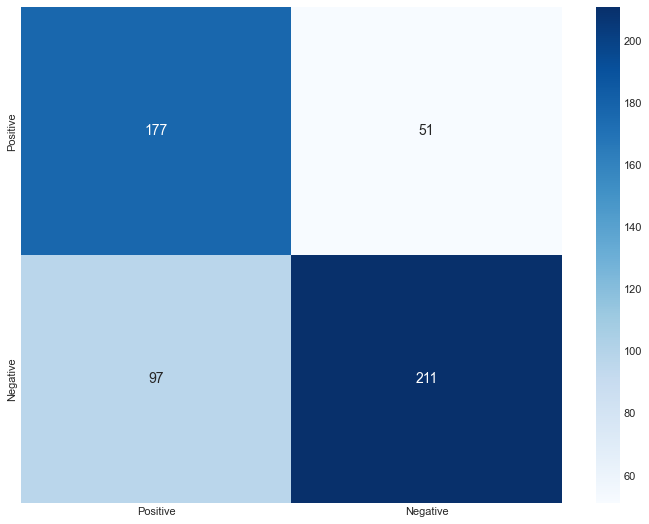

Test Confusion matrix


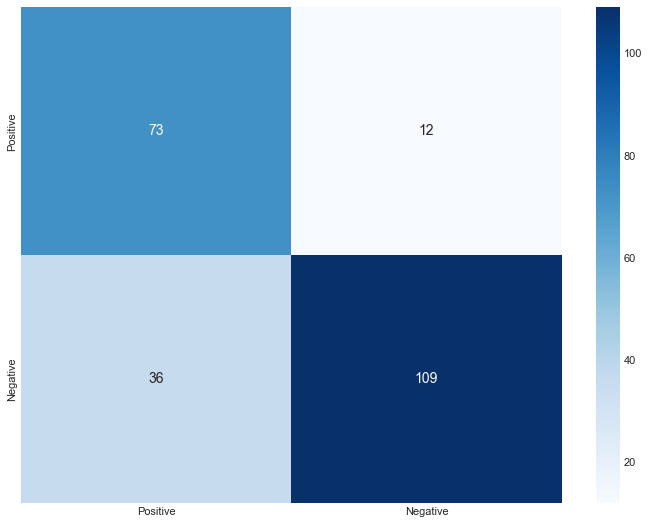

In [273]:

plot_confusionmatrix(train_pred,y_train,dom='Train')
plot_confusionmatrix(test_pred,y_test,dom='Test')

# Classification Report

In [274]:
print(classification_report(y_train, train_pred))

              precision    recall  f1-score   support

           0       0.78      0.65      0.71       274
           1       0.69      0.81      0.74       262

    accuracy                           0.72       536
   macro avg       0.73      0.73      0.72       536
weighted avg       0.73      0.72      0.72       536



In [275]:
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.86      0.67      0.75       109
           1       0.75      0.90      0.82       121

    accuracy                           0.79       230
   macro avg       0.81      0.79      0.79       230
weighted avg       0.80      0.79      0.79       230



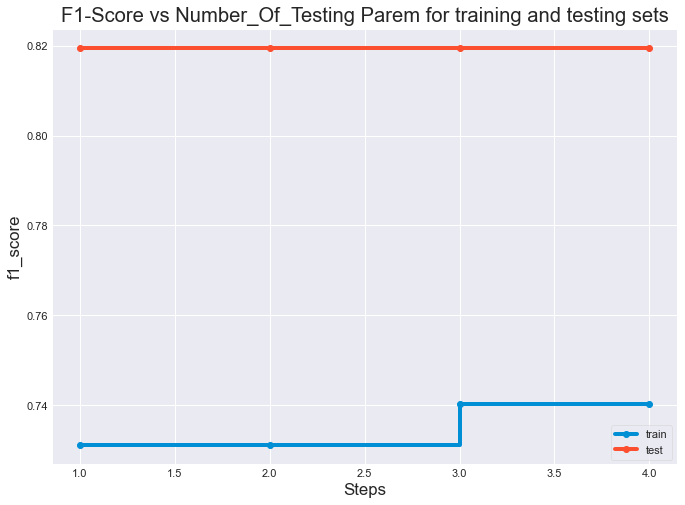

In [276]:
number = []
for i in range (1,len(train_results_total)+1):
    number.append(i)
max_depths = np.linspace(1, 32, 32, endpoint=True) # List of values for tuning
fig, ax = plt.subplots()
ax.set_xlabel("Steps")
ax.set_ylabel("f1_score")
ax.set_title("F1-Score vs Number_Of_Testing Parem for training and testing sets")
ax.plot(number, train_results_total, marker='o', label="train",drawstyle="steps-post")
ax.plot(number, test_results_total, marker='o', label="test",drawstyle="steps-post")
ax.legend()
plt.show()

 ##  ❓<span style="color:blue ">OBSERVATION: </span>
 Logistic Regression has the lowest f1_score and high overfit

# 🌴🌴🌴 Raindom Forest
***
![Raindom Forest](https://upload.wikimedia.org/wikipedia/commons/7/76/Random_forest_diagram_complete.png)
> Random forest works with Classification and Regression problems. Random forest use decision trees and builds on different sample.The most vote on every tree will be selected.

> One of the most essential characteristics of the Random Forest Algorithm is that it can handle data sets with both continuous variables (as in regression) and categorical variables (as in classification). It outperforms other algorithms in categorization tasks.


In [277]:
"""#6.Decision Tree Classifier"""
rf = RandomForestClassifier(random_state = seed)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
y_pred_train = rf.predict(X_train)

In [278]:
train_results_total = [] # Store train accuracy results
test_results_total = []  # Store test accuracy results


## Hypertunning 

In [279]:
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold
"""For DT, the following hyperparameters are usually tunned."""



'For DT, the following hyperparameters are usually tunned.'

In [280]:
# helper function
def plot_confusionmatrix(y_train_pred,y_train,dom):
    print(f'{dom} Confusion matrix')
    cf = confusion_matrix(y_train_pred,y_train)
    sns.heatmap(cf,annot=True,yticklabels=['Positive','Negative']
               ,xticklabels=['Positive','Negative'],cmap='Blues', fmt='g')
    plt.xlabel('Predicted',fontsize = 25)
    plt.ylabel('True',fontsize = 25)
    plt.tight_layout()
    plt.show()


In [281]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.82      0.79       109
           1       0.82      0.78      0.80       121

    accuracy                           0.80       230
   macro avg       0.80      0.80      0.80       230
weighted avg       0.80      0.80      0.80       230



In [282]:

   rf.fit(X_train, y_train)
   train_pred = rf.predict(X_train)
   train_acc = f1_score(y_train, train_pred)
   # Add accuracy score to previous train results
   train_results.append(train_acc)

   #test
   test_pred = rf.predict(X_test)
   test_acc = f1_score(y_test, test_pred)
   # Add auc score to previous test results
   test_results.append(test_acc)

   print('The Training f1 Accuracy for max_depth {} is:'.format(max_depth), train_acc)
   print('The Test f1 Accuracy for max_depth {} is:'.format(max_depth), test_acc)


The Training f1 Accuracy for max_depth 2 is: 1.0
The Test f1 Accuracy for max_depth 2 is: 0.7999999999999999


# Gridsearch

In [283]:
import numpy as np 
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score

random_search =     {'bootstrap': [True],
    'max_depth': [80, 90, 100],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300]}

gcv = GridSearchCV(estimator=rf,param_grid=random_search,cv=3, n_jobs=-1, verbose=1, scoring = "f1")
gcv.fit(X_train,y_train)

Fitting 3 folds for each of 162 candidates, totalling 486 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300]},
             scoring='f1', verbose=1)

In [284]:
## Getting the best of everything. 
print (gcv.best_score_)
print (gcv.best_params_)
print(gcv.best_estimator_)

0.8041491201522876
{'bootstrap': True, 'max_depth': 80, 'max_features': 2, 'min_samples_leaf': 4, 'min_samples_split': 8, 'n_estimators': 200}
RandomForestClassifier(max_depth=80, max_features=2, min_samples_leaf=4,
                       min_samples_split=8, n_estimators=200, random_state=42)


In [285]:
from sklearn.metrics import f1_score
train_results = [] # Store train accuracy results
test_results = []  # Store test accuracy results
for max_depth in range(1,3):
   rf = RandomForestClassifier(
                               bootstrap = True,
                               n_estimators= 400,
                               max_features = 2,
                                         min_samples_split= 8,
                                         min_samples_leaf= 3,
                                         max_depth= 80,
                                       random_state=42,
                                       ccp_alpha = .01,
                                         criterion= 'gini')

   rf.fit(X_train, y_train)
   train_pred = rf.predict(X_train)
   train_acc = f1_score(y_train, train_pred)
   # Add accuracy score to previous train results
   train_results.append(train_acc)

   #test
   test_pred = rf.predict(X_test)
   test_acc = f1_score(y_test, test_pred)
   # Add auc score to previous test results
   test_results.append(test_acc)
   train_results_total.append(train_acc)
   test_results_total.append(test_acc)

   print('The Training f1 Accuracy for max_depth {} is:'.format(max_depth), train_acc)
   print('The Test f1 Accuracy for max_depth {} is:'.format(max_depth), test_acc)



The Training f1 Accuracy for max_depth 1 is: 0.839779005524862
The Test f1 Accuracy for max_depth 1 is: 0.8016528925619834
The Training f1 Accuracy for max_depth 2 is: 0.839779005524862
The Test f1 Accuracy for max_depth 2 is: 0.8016528925619834


In [286]:
from sklearn.metrics import f1_score
train_results = [] # Store train accuracy results
test_results = []  # Store test accuracy results
for max_depth in range(1,3):
   rf = RandomForestClassifier(
                               bootstrap = True,
                               n_estimators= 400,
                               max_features = 6,
                                         min_samples_split= 8,
                                         min_samples_leaf= 3,
                                           max_leaf_nodes=12,
                                         max_depth= 120,
                                       random_state=42,
                                       ccp_alpha = .01,
                                         criterion= 'gini')

   rf.fit(X_train, y_train)
   train_pred = rf.predict(X_train)
   train_acc = f1_score(y_train, train_pred)
   # Add accuracy score to previous train results
   train_results.append(train_acc)

   #test
   test_pred = rf.predict(X_test)
   test_acc = f1_score(y_test, test_pred)
   # Add auc score to previous test results
   test_results.append(test_acc)
   train_results_total.append(train_acc)
   test_results_total.append(test_acc)

   print('The Training f1 Accuracy for max_depth {} is:'.format(max_depth), train_acc)
   print('The Test f1 Accuracy for max_depth {} is:'.format(max_depth), test_acc)



The Training f1 Accuracy for max_depth 1 is: 0.8451730418943533
The Test f1 Accuracy for max_depth 1 is: 0.8148148148148149
The Training f1 Accuracy for max_depth 2 is: 0.8451730418943533
The Test f1 Accuracy for max_depth 2 is: 0.8148148148148149


# F1 Score

In [287]:
train_acc = f1_score(y_train, train_pred)
test_acc = f1_score(y_test, test_pred)
print("Train F1 score: " + str(train_acc))
print("Test F1 score: " + str(test_acc))

Train F1 score: 0.8451730418943533
Test F1 score: 0.8148148148148149


Train Confusion matrix


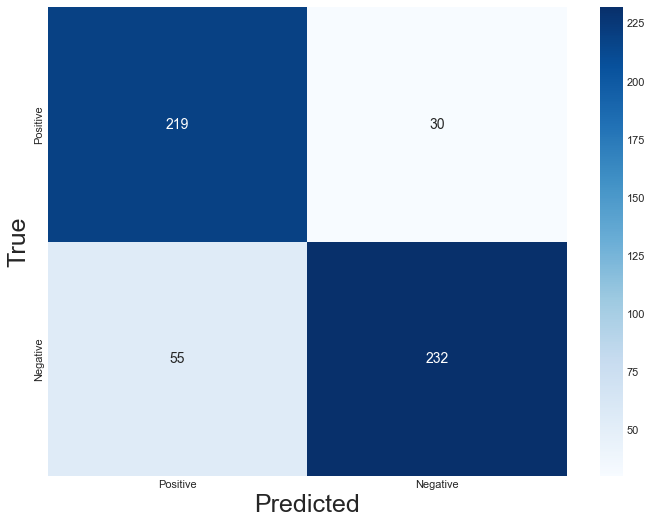

Test Confusion matrix


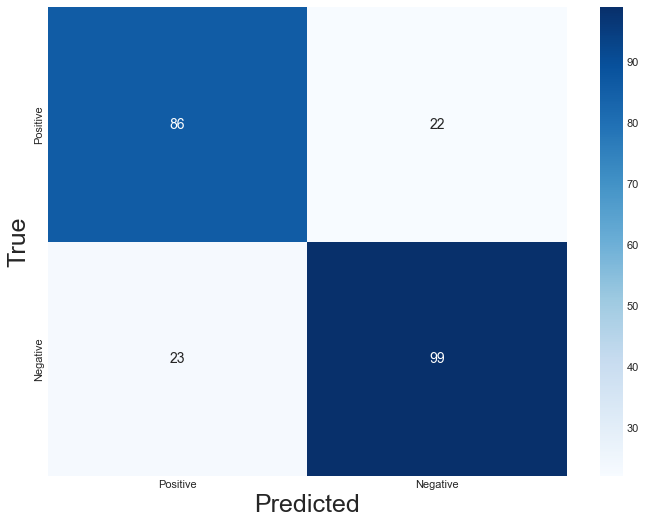

In [288]:

plot_confusionmatrix(train_pred,y_train,dom='Train')
plot_confusionmatrix(test_pred,y_test,dom='Test')

# Random Forest Classification Report

In [289]:
print(classification_report(y_train, train_pred))

              precision    recall  f1-score   support

           0       0.88      0.80      0.84       274
           1       0.81      0.89      0.85       262

    accuracy                           0.84       536
   macro avg       0.84      0.84      0.84       536
weighted avg       0.84      0.84      0.84       536



In [290]:
print(classification_report(y_test, test_pred))

              precision    recall  f1-score   support

           0       0.80      0.79      0.79       109
           1       0.81      0.82      0.81       121

    accuracy                           0.80       230
   macro avg       0.80      0.80      0.80       230
weighted avg       0.80      0.80      0.80       230



# Total F1-Score Graph trial and Error

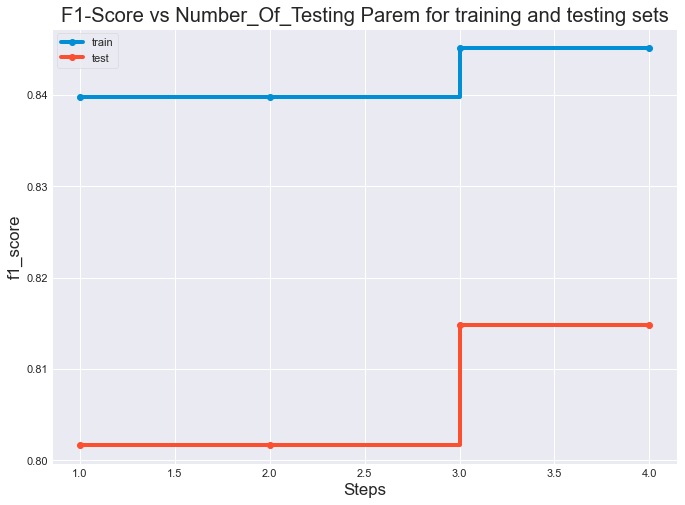

In [291]:
number = []
for i in range (1,len(train_results_total)+1):
    number.append(i)
max_depths = np.linspace(1, 32, 32, endpoint=True) # List of values for tuning
fig, ax = plt.subplots()
ax.set_xlabel("Steps")
ax.set_ylabel("f1_score")
ax.set_title("F1-Score vs Number_Of_Testing Parem for training and testing sets")
ax.plot(number, train_results_total, marker='o', label="train",drawstyle="steps-post")
ax.plot(number, test_results_total, marker='o', label="test",drawstyle="steps-post")
ax.legend()
plt.show()

 ##  ❓<span style="color:blue ">OBSERVATION: </span>
 
I choose paremeter these f1_score 

Train F1 score: 0.8451730418943533

Test F1 score: 0.8148148148148149

# Model Selection

In [292]:
"""Create a function that returns learning curves for different classifiers."""
def plotLearningCurve(model):
    """Returns a plot of learning curve of a model."""
    
    # Create feature matrix and target vector
    X, y = X_train, y_train
    # Create CV training and test scores for various training set sizes
    trainSizes, trainScores, testScores = learning_curve(model, X, y, cv = 10,
                                                    scoring="accuracy", n_jobs = -1, 
                                                    train_sizes = np.linspace(0.01, 1.0, 17), # 17 different sizes of the training set
                                                    random_state = seed)
                                                    

    # Create means and standard deviations of training set scores
    trainMean = np.mean(trainScores, axis = 1)
    trainStd = np.std(trainScores, axis = 1)

    # Create means and standard deviations of test set scores
    testMean = np.mean(testScores, axis = 1)
    testStd = np.std(testScores, axis = 1)

    # Draw lines
    plt.plot(trainSizes, trainMean, "o-", color = "red",  label = "training score")
    plt.plot(trainSizes, testMean, "o-", color = "green", label = "cross-validation score")
    
    # Draw bands
    plt.fill_between(trainSizes, trainMean - trainStd, trainMean + trainStd, alpha = 0.1, color = "r") # Alpha controls band transparency.
    plt.fill_between(trainSizes, testMean - testStd, testMean + testStd, alpha = 0.1, color = "g")

    # Create plot
    font_size = 15
    plt.xlabel("Training Set Size", fontsize = font_size)
    plt.ylabel("Accuracy Score", fontsize = font_size)
    plt.xticks(fontsize = font_size)
    plt.yticks(fontsize = font_size)
    plt.legend(loc = "best")
    plt.grid()

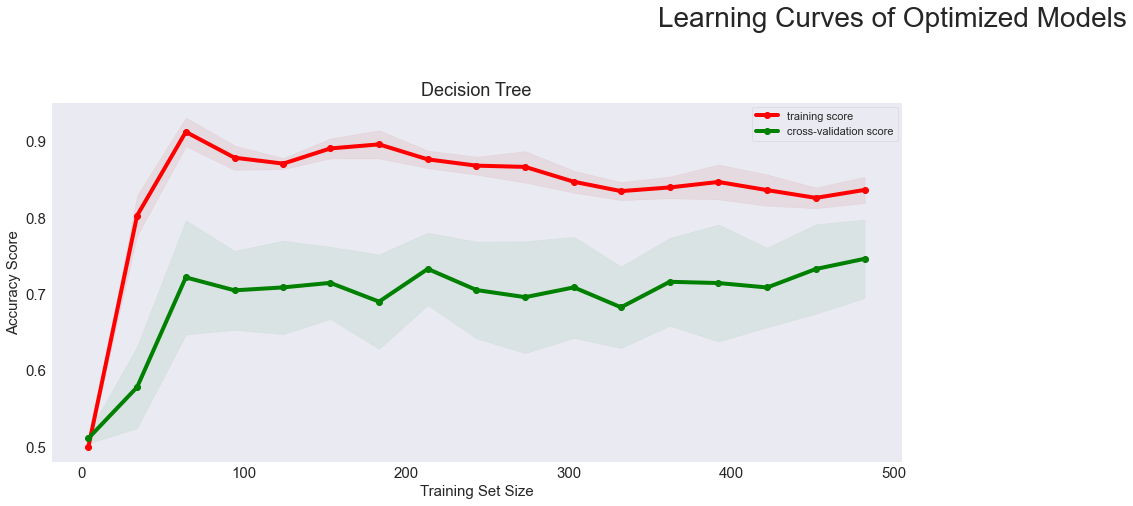

In [293]:
"""Now plot learning curves of the optimized models in subplots."""
plt.figure(figsize = (25,25))
lcModels = [decisionTree]
lcLabels = ["Decision Tree"]

for ax, model, label in zip (range(1,9), lcModels, lcLabels):
    plt.subplot(4,2,ax)
    plotLearningCurve(model)
    plt.title(label, fontsize = 18)
plt.suptitle("Learning Curves of Optimized Models", fontsize = 28)
plt.tight_layout(rect = [0, 0.03, 1, 0.97])

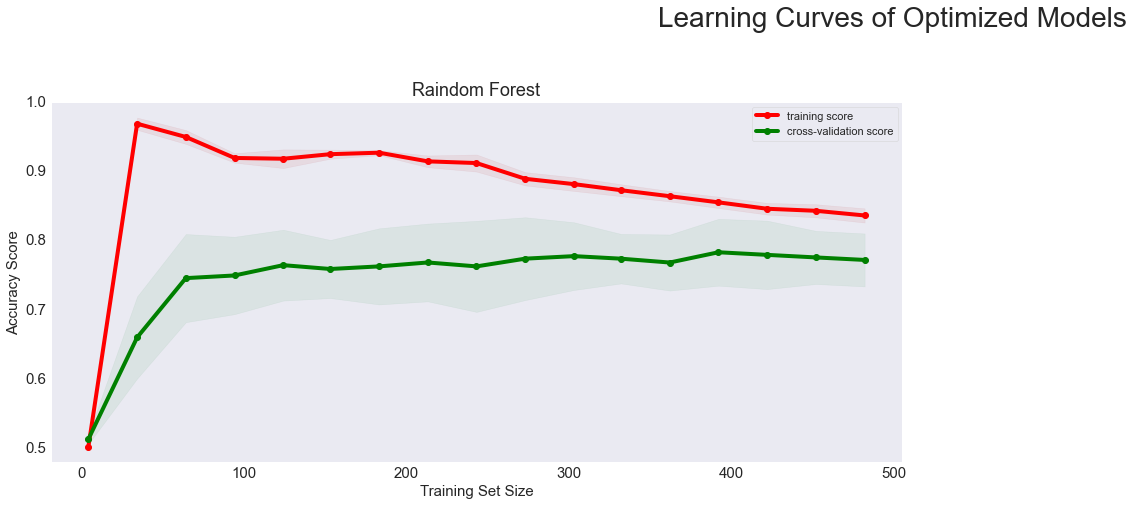

In [294]:
"""Now plot learning curves of the optimized models in subplots."""
plt.figure(figsize = (25,25))
lcModels = [rf]
lcLabels = ["Raindom Forest"]

for ax, model, label in zip (range(1,9), lcModels, lcLabels):
    plt.subplot(4,2,ax)
    plotLearningCurve(model)
    plt.title(label, fontsize = 18)
plt.suptitle("Learning Curves of Optimized Models", fontsize = 28)
plt.tight_layout(rect = [0, 0.03, 1, 0.97])

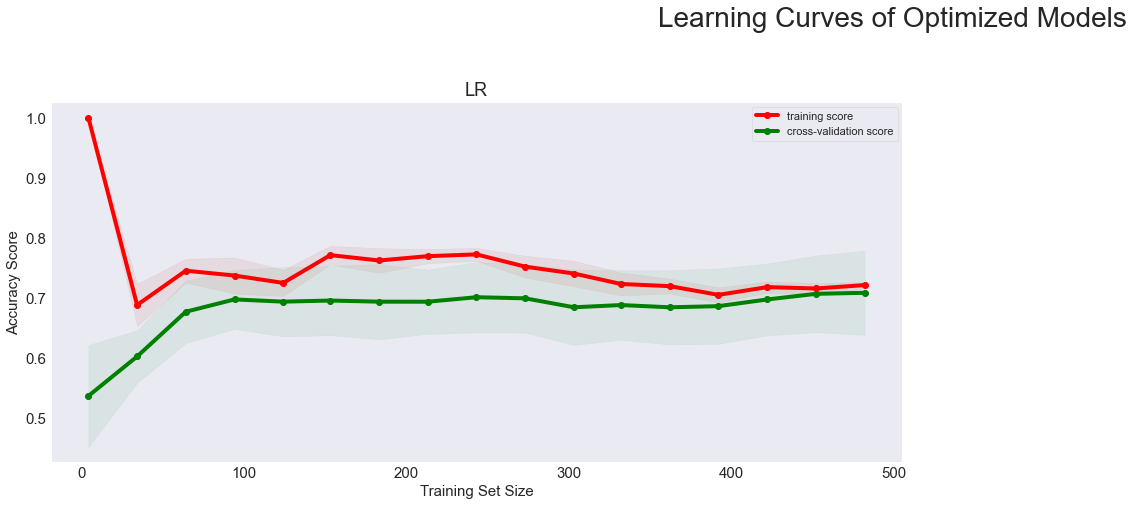

In [295]:
"""Now plot learning curves of the optimized models in subplots."""
plt.figure(figsize = (25,25))
lcModels = [lr]
lcLabels = ["LR"]

for ax, model, label in zip (range(1,9), lcModels, lcLabels):
    plt.subplot(4,2,ax)
    plotLearningCurve(model)
    plt.title(label, fontsize = 18)
plt.suptitle("Learning Curves of Optimized Models", fontsize = 28)
plt.tight_layout(rect = [0, 0.03, 1, 0.97])

 ##  ❓<span style="color:blue ">OBSERVATION: </span>
 

> The plot Decision Tree shows the best result with f1_score is highest and less overfit.
    
> Logistic Regression is least overfit but f1_score is lowest

> Random Forest has the high f1_score but high overfit



In [296]:
"""List of all the models with their indices."""
modelNames = ["LR", "RF", "DT"]
models = [lr, rf, decisionTree]

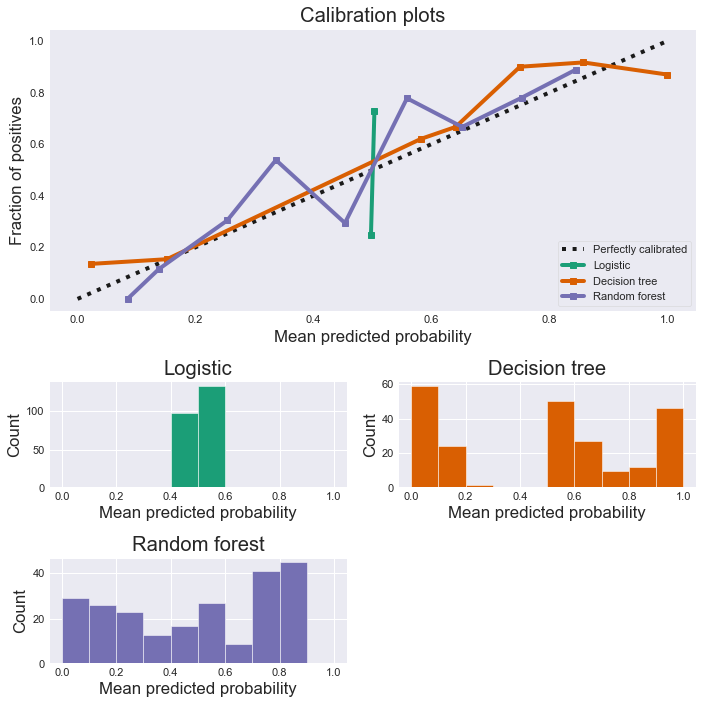

In [297]:
clf_list = [
    (lr, "Logistic"),
    (decisionTree, "Decision tree"),
    (rf, "Random forest"),
]
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from sklearn.calibration import CalibrationDisplay


fig = plt.figure(figsize=(10, 10))
gs = GridSpec(4, 2)
colors = plt.cm.get_cmap("Dark2")

ax_calibration_curve = fig.add_subplot(gs[:2, :2])
calibration_displays = {}
for i, (clf, name) in enumerate(clf_list):
    clf.fit(X_train, y_train)
    display = CalibrationDisplay.from_estimator(
        clf,
        X_test,
        y_test,
        n_bins=10,
        name=name,
        ax=ax_calibration_curve,
        color=colors(i),
    )
    calibration_displays[name] = display

ax_calibration_curve.grid()
ax_calibration_curve.set_title("Calibration plots")
# Add histogram
grid_positions = [(2, 0), (2, 1), (3, 0), (3, 1)]
for i, (_, name) in enumerate(clf_list):
    row, col = grid_positions[i]
    ax = fig.add_subplot(gs[row, col])

    ax.hist(
        calibration_displays[name].y_prob,
        range=(0, 1),
        bins=10,
        label=name,
        color=colors(i),
    )
    ax.set(title=name, xlabel="Mean predicted probability", ylabel="Count")

plt.tight_layout()
plt.show()


 ##  ❓<span style="color:blue ">OBSERVATION: </span>
 

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#3D3D3D;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:#FFD154;">
Decision is the most closest shape to perfectly calibrate which mean Decision tree has the most prediction correctly.
</p>
</div>


 ## ✔<span style="color:red">CONCLUSION: </span>
 

<div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#3D3D3D;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:#FFD154;">
I choose Decision Tree Model because it provides the highest F1_score . It also more fit to the mean and less overfit than other model.It means the Decision Tree model can provides the more trusted predicted due to less false results.
</p>
</div>


<a id="4"></a>
<h1 style="color:red;font-size:40px;font-family:Georgia;text-align:center;"><strong> 4. Further Evaluation on choosen model ( Decision Tree)</strong></h1>

***

# Precision-Recall vs Threshold Curve
Depending on the categorization challenge, we may desire a high accuracy or a high recall. The problem is that improving accuracy leads to reduced recall and vice versa. This is known as the precision-recall tradeoff, and it may be shown using the precision-recall curve as a function of the decision threshold.

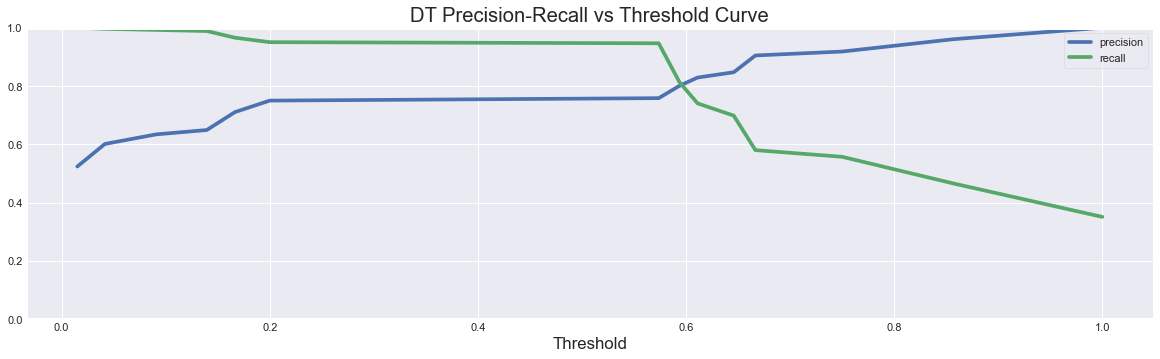

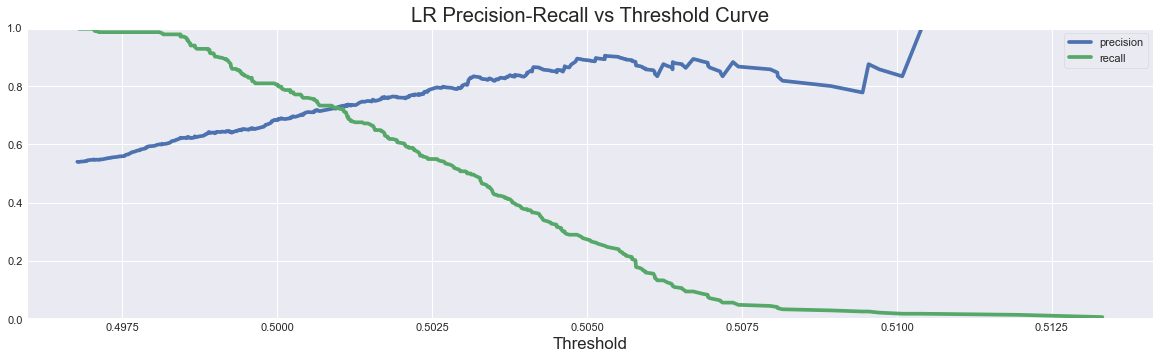

In [298]:
"""Function for plotting precision-recall vs threshold curve."""
def plotPrecisionRecallVsThresholdCurve(model, title):
    """Plots precision-recall vs threshold curve for a model."""

    probablity = model.predict_proba(X_train)[:, 1]
    plt.figure(figsize = (18, 5))
    precision, recall, threshold = precision_recall_curve(y_train, probablity)
    plt.plot(threshold, precision[:-1], "b-", label = "precision", lw = 3.7)
    plt.plot(threshold, recall[:-1], "g", label = "recall", lw = 3.7)
    plt.xlabel("Threshold")
    plt.legend(loc = "best")
    plt.ylim([0, 1])
    plt.title(title)
    plt.show()

"""Now plot precision-recall vs threshold curve for rf and gbc."""
plotPrecisionRecallVsThresholdCurve(decisionTree, title = "DT Precision-Recall vs Threshold Curve" )
plotPrecisionRecallVsThresholdCurve(lr, title = "LR Precision-Recall vs Threshold Curve" )

##  ❓<span style="color:blue ">OBSERVATION: </span>
As we can see, the recall for DT declines fast, with an accuracy of roughly 86 percent. As a result, we must choose the precision-recall tradeoff before 84 percent precision, which may be around 84 percent. For example, if we want an accuracy of 80% off DT, we'd require a threshold of roughly 0.5.

For LR, on the other hand, recall declines quickly at a precision of roughly 84 percent, thus we would choose a precision-recall tradeoff at around 80 percent precision. A accuracy of roughly 81 percent off LR would necessitate a threshold of around 0.5.

#  Precision-Recall Curve 
We may also plot accuracy vs recall to obtain a sense of the precision-recall tradeoff, where the y-axis represents precision and the x-axis indicates recall. I plot recall on the y-axis and precision on the x-axis in my graphic.

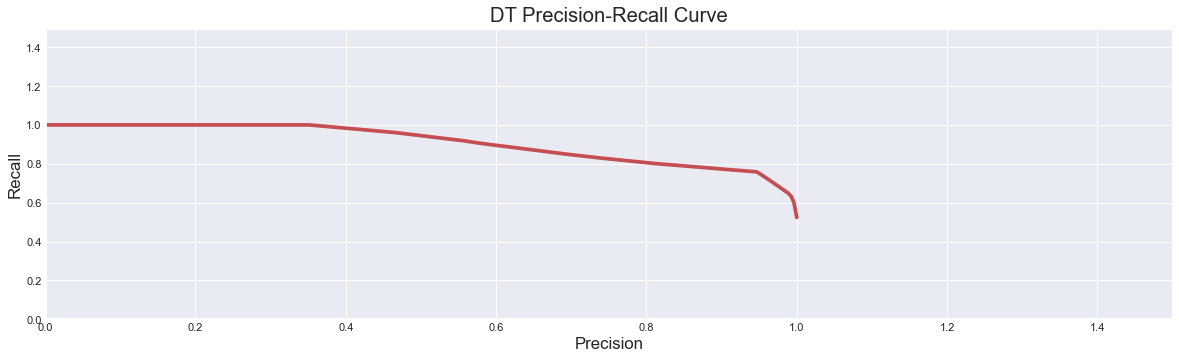

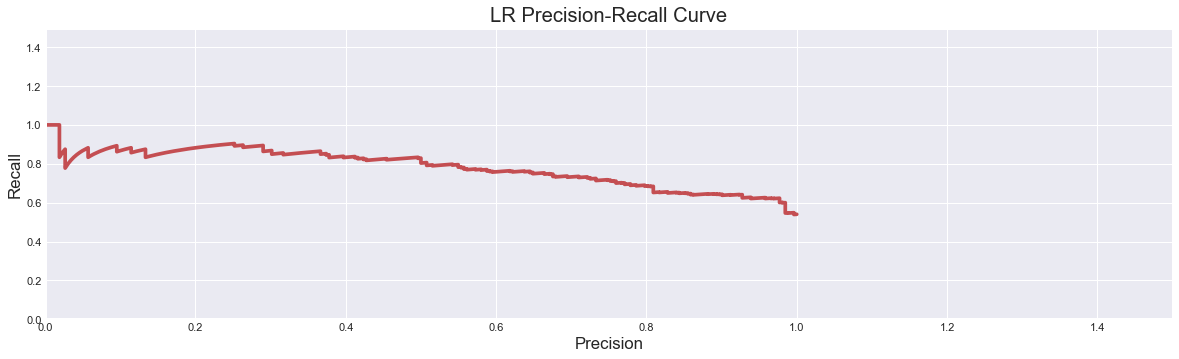

In [299]:
"""Function to plot recall vs precision curve."""
def plotPrecisionVsRecallCurve(model, title):
    """Return amodel's recall vs precision curve."""
    
    probablity = model.predict_proba(X_train)[:, 1]
    plt.figure(figsize = (18, 5))
    precision, recall, threshold = precision_recall_curve(y_train, probablity)
    plt.plot(recall, precision, "r-", lw = 3.7)
    plt.ylabel("Recall")
    plt.xlabel("Precision")
    plt.axis([0, 1.5, 0, 1.5])
    plt.title(title)
    plt.show()

"""Now plot recall vs precision curve of rf and gbc."""
plotPrecisionVsRecallCurve(decisionTree, title = "DT Precision-Recall Curve")
plotPrecisionVsRecallCurve(lr, title = "LR Precision-Recall Curve")

##  ❓<span style="color:blue ">OBSERVATION: </span>
We can see recall falls rapidly at around a precision of 0.4 for both DT and 0.5 for LR that we've observed in the previous section.

# ROC Curve & AUC Score 
The ROC (Reicever Operating Characteristic Curve) is a representation of a classifier's true positive rate vs its false positive rate. It demonstrates the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity). The AUC (Area under the ROC Curve) score corresponds to the AUC Curve. It is simply calculated by calculating the area under the ROC curve, which is known as AUC. For our two classifiers, we will plot the ROC curve and AUC score together.

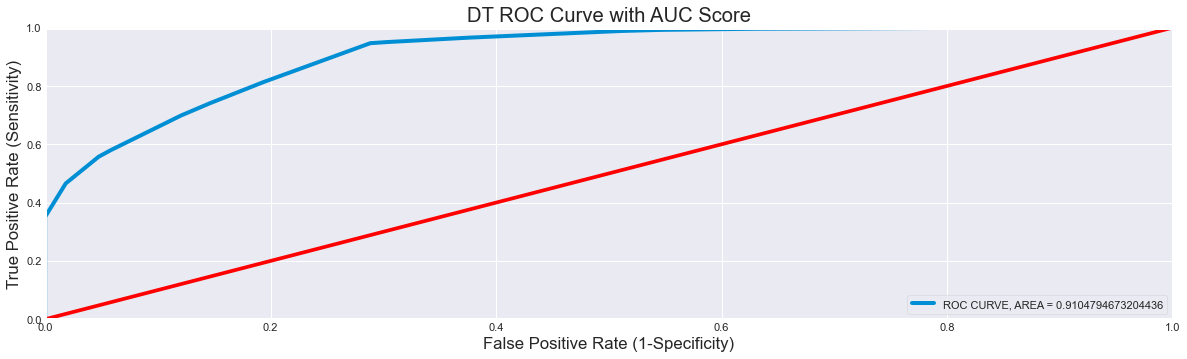

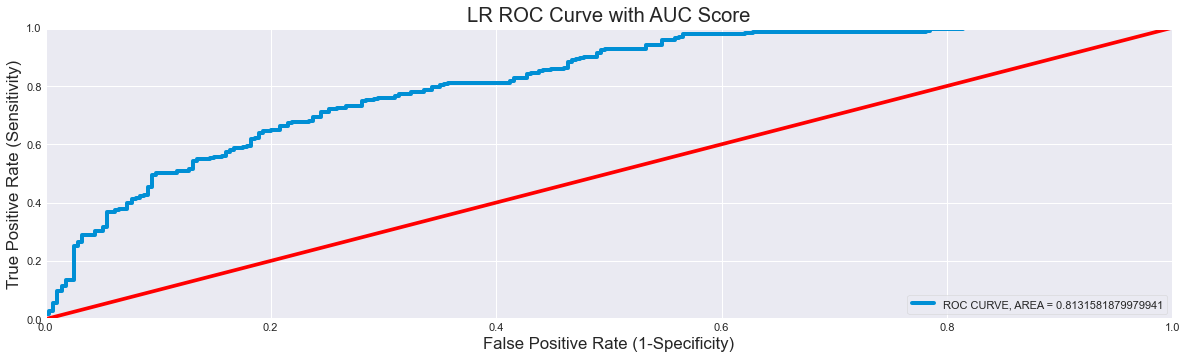

In [300]:
"""Function to plot ROC curve with AUC score."""
def plotRocAndAucScore(model, title):
    """Returns roc and auc score of a model."""
    
    probablity = model.predict_proba(X_train)[:, 1]
    plt.figure(figsize = (18, 5))
    false_positive_rate, true_positive_rate, threshold = roc_curve(y_train, probablity)
    auc_score = roc_auc_score(y_train, probablity)
    plt.plot(false_positive_rate, true_positive_rate, label = "ROC CURVE, AREA = "+ str(auc_score))
    plt.plot([0, 1], [0, 1], "red", lw = 3.7)
    plt.xlabel("False Positive Rate (1-Specificity)")
    plt.ylabel("True Positive Rate (Sensitivity)")
    plt.axis([0, 1, 0, 1])
    plt.legend(loc = 4)
    plt.title(title)
    plt.show()

"""Plot roc curve and auc score for rf and gbc."""
plotRocAndAucScore(decisionTree, title = "DT ROC Curve with AUC Score")
plotRocAndAucScore(lr, title = "LR ROC Curve with AUC Score")

### This plot tells few different things:

A model that predicts at chance will have an ROC curve that looks like the diagonal red line. That is not a discriminating model.

The further the curve is off the diagonal red line, the better the model is at discriminating between positives and negatives in general.

There are useful statistics that can be calculated from this curve, like the Area Under the Curve (AUC). This tells you how well the model predicts and the optimal cut point for any given model (under specific circumstances).

Comparing the two ROC curves, we can see the distance between blue and red line of RF is greater than the distance between blue and red line of LR. Hence it can safely be said that RF, in general, is better at discriminating between positives and negatives than LR. Also RF(91.04%) auc score (which is the area under the roc curve) is greater than LR(81.94%). It seems the higher the area, the further the classifier is off the red diagonal line and vice versa and hence more accurate. Since RF has more area under the ROC curve than LR, RF is more accurate.

# Export prediction to .csv

In [301]:
labels_df = pd.DataFrame({
        "ID":test['ID'] ,
        "Sepsis": decisionTree.predict(X_train[:167,:])
    })
print(labels_df)
labels_df.to_csv(r'Sepsis_prediction.csv',index = False)

            ID  Sepsis
0    ICU200609       1
1    ICU200610       0
2    ICU200611       1
3    ICU200612       1
4    ICU200613       1
..         ...     ...
164  ICU200773       0
165  ICU200774       0
166  ICU200775       1
167  ICU200776       1
168  ICU200777       1

[167 rows x 2 columns]
